In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import random
from numpy.random import randint as ri
import matplotlib.pyplot as plt
import matplotlib as mpl

# Covid-19 Malaysia Report

In [50]:
my_data = pd.read_excel('C:/Users/tuhin/DATA SCIENCE/DATA ANALYSIS & VISUALIZATION/dataSet/COVID_19_Most_Updated.xlsx')       # or example.csv
my_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-02,2,11,2020,132,5,Afghanistan,AF,AFG,38041757.0,Asia,3.766913
1,2020-11-01,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019
2,2020-10-31,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989
3,2020-10-30,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833
4,2020-10-29,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.941505


In [51]:
data = my_data[['dateRep', 'geoId', 'cases', 'deaths']]
data.head()

,dateRep,geoId,cases,deaths
0,2020-11-02,AF,132,5
1,2020-11-01,AF,76,0
2,2020-10-31,AF,157,4
3,2020-10-30,AF,123,3
4,2020-10-29,AF,0,0


In [52]:
data.set_index(['geoId', 'dateRep'], inplace=True)

In [53]:
data.head()

cases  deaths
geoId dateRep                  
AF    2020-11-02    132       5
      2020-11-01     76       0
      2020-10-31    157       4
      2020-10-30    123       3
      2020-10-29      0       0

In [54]:
bd = data.loc['MY']
bd

,cases,deaths
dateRep,,
2020-11-02,957,0
2020-11-01,649,0
2020-10-31,809,3
2020-10-30,679,0
2020-10-29,771,8
...,...,...
2020-01-04,0,0
2020-01-03,0,0
2020-01-02,0,0


In [55]:
bd = bd.sort_index()
bd

,cases,deaths
dateRep,,
2019-12-31,0,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0
...,...,...
2020-10-29,771,8
2020-10-30,679,0
2020-10-31,809,3


In [56]:
bd_cases = bd['cases']
bd_deaths = bd['deaths']

# New Cases per day vs Deaths per day

### View - 1

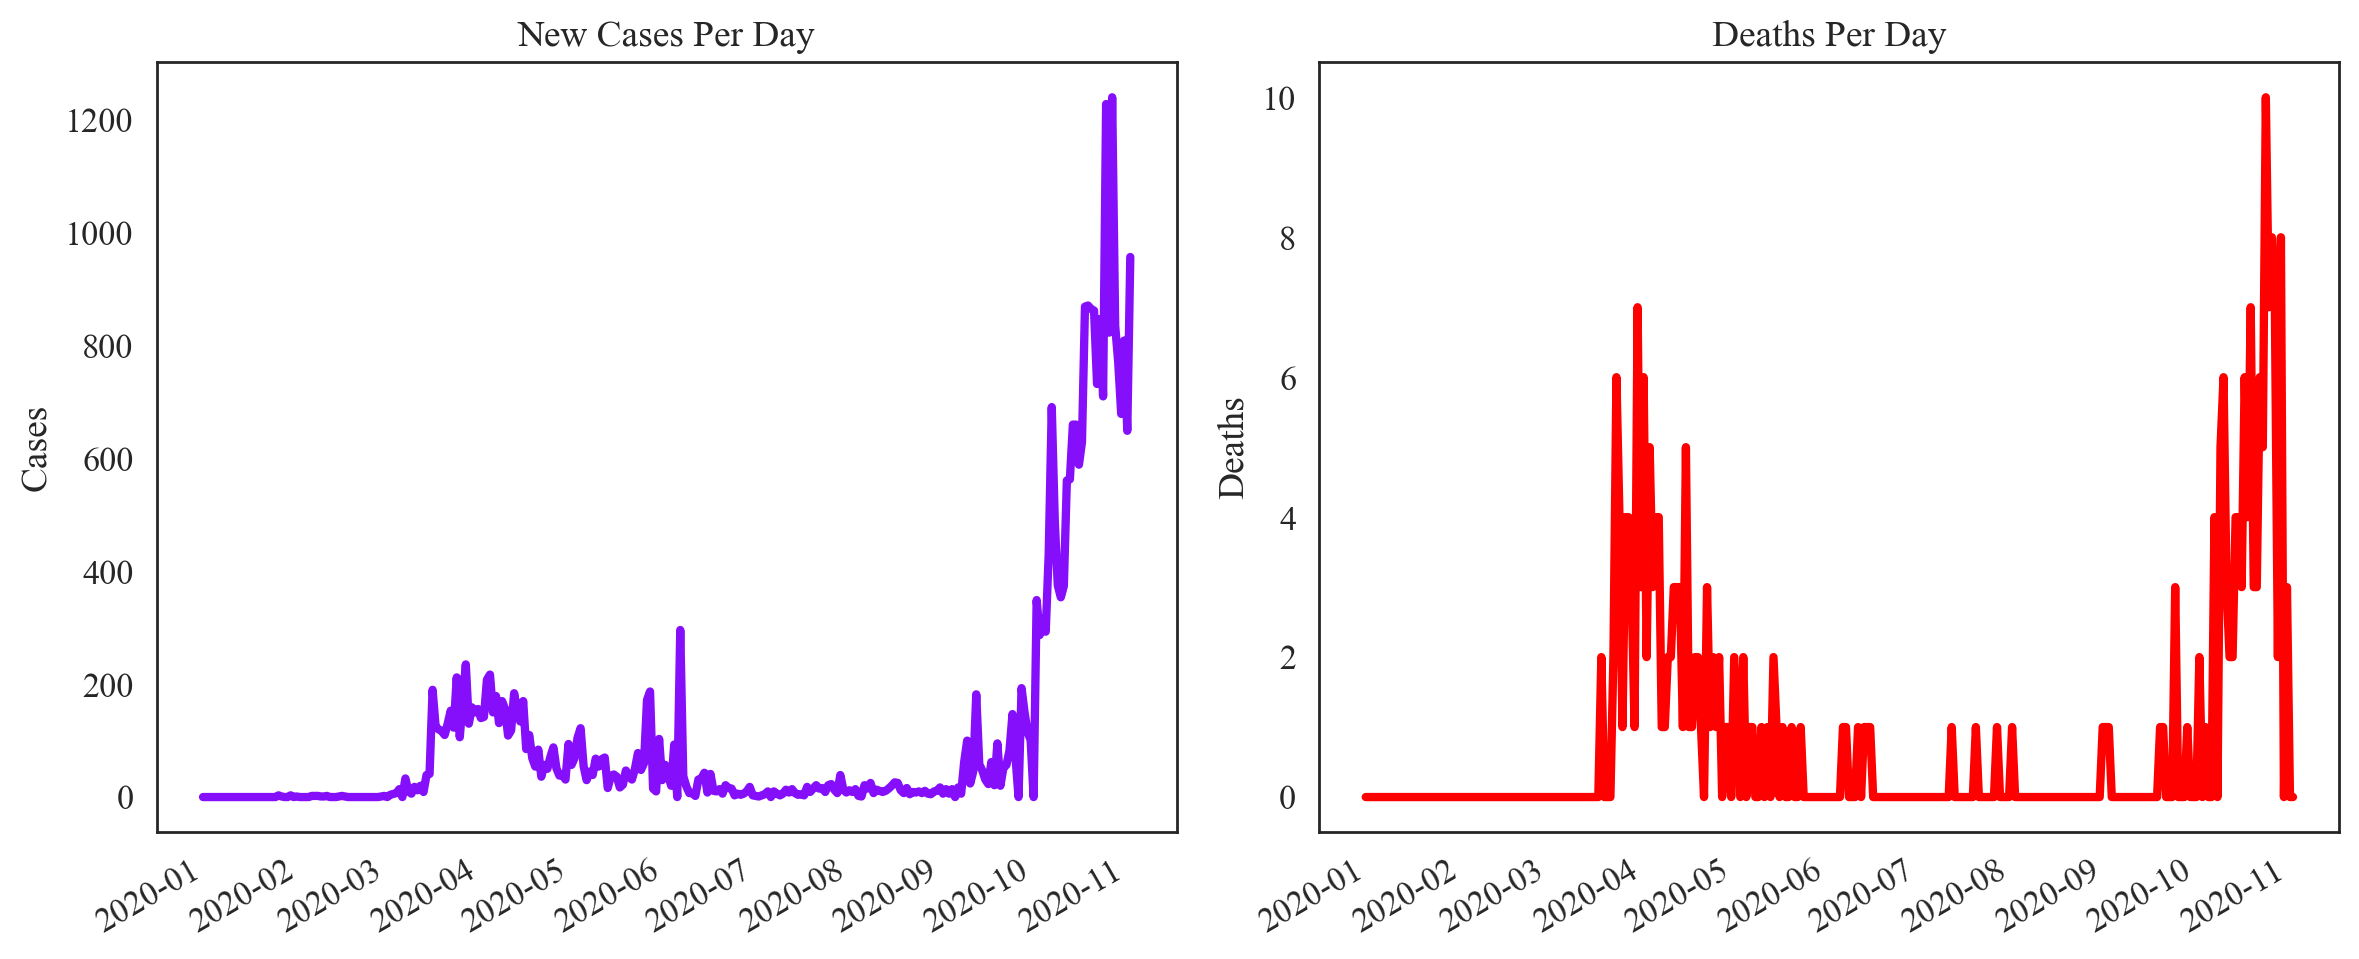

In [57]:
sns.set(context='paper', 
        style='white', 
        palette='viridis', 
        font='times new roman', 
        font_scale=1.4)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=200)

axes[0].plot(bd_cases, label='Amount', color='#850ffa', lw=3, ls='-')
axes[1].plot(bd_deaths, label='Total Amount', color='#ff0000', lw=3, ls='-')

axes[0].set_title('New Cases Per Day')
axes[0].set_ylabel('Cases')

axes[1].set_title('Deaths Per Day')
axes[1].set_ylabel('Deaths')

plt.gcf().autofmt_xdate()

fig.tight_layout() 

### View - 2

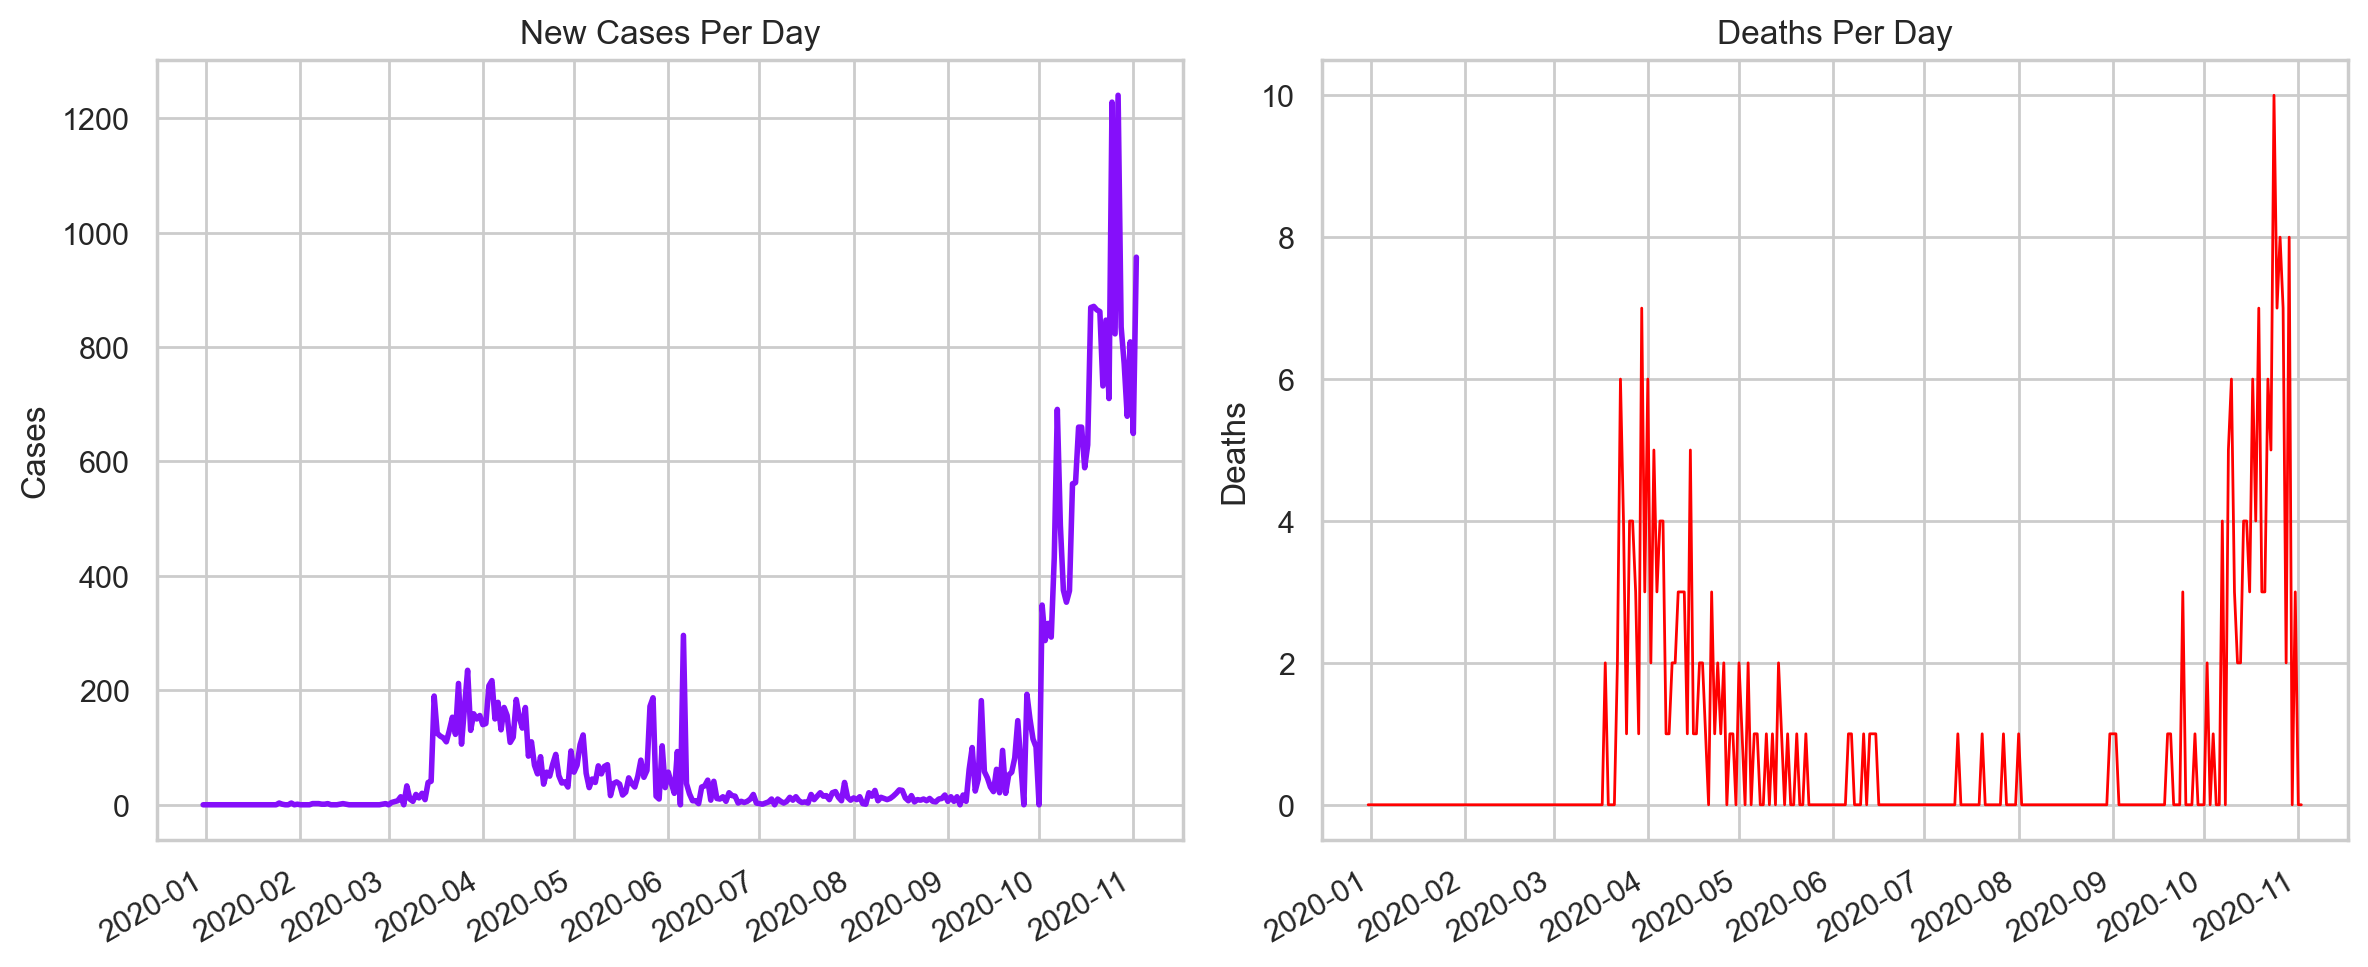

In [58]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='BuGn_r', 
        font='arial', 
        font_scale=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=200)

axes[0].plot(bd_cases, label='Amount', color='#850ffa', lw=2, ls='-')
axes[1].plot(bd_deaths, label='Total Amount', color='#ff0000', lw=1, ls='-')

axes[0].set_title('New Cases Per Day')
axes[0].set_ylabel('Cases')

axes[1].set_title('Deaths Per Day')
axes[1].set_ylabel('Deaths')

plt.gcf().autofmt_xdate()

fig.tight_layout() 

### View - 3

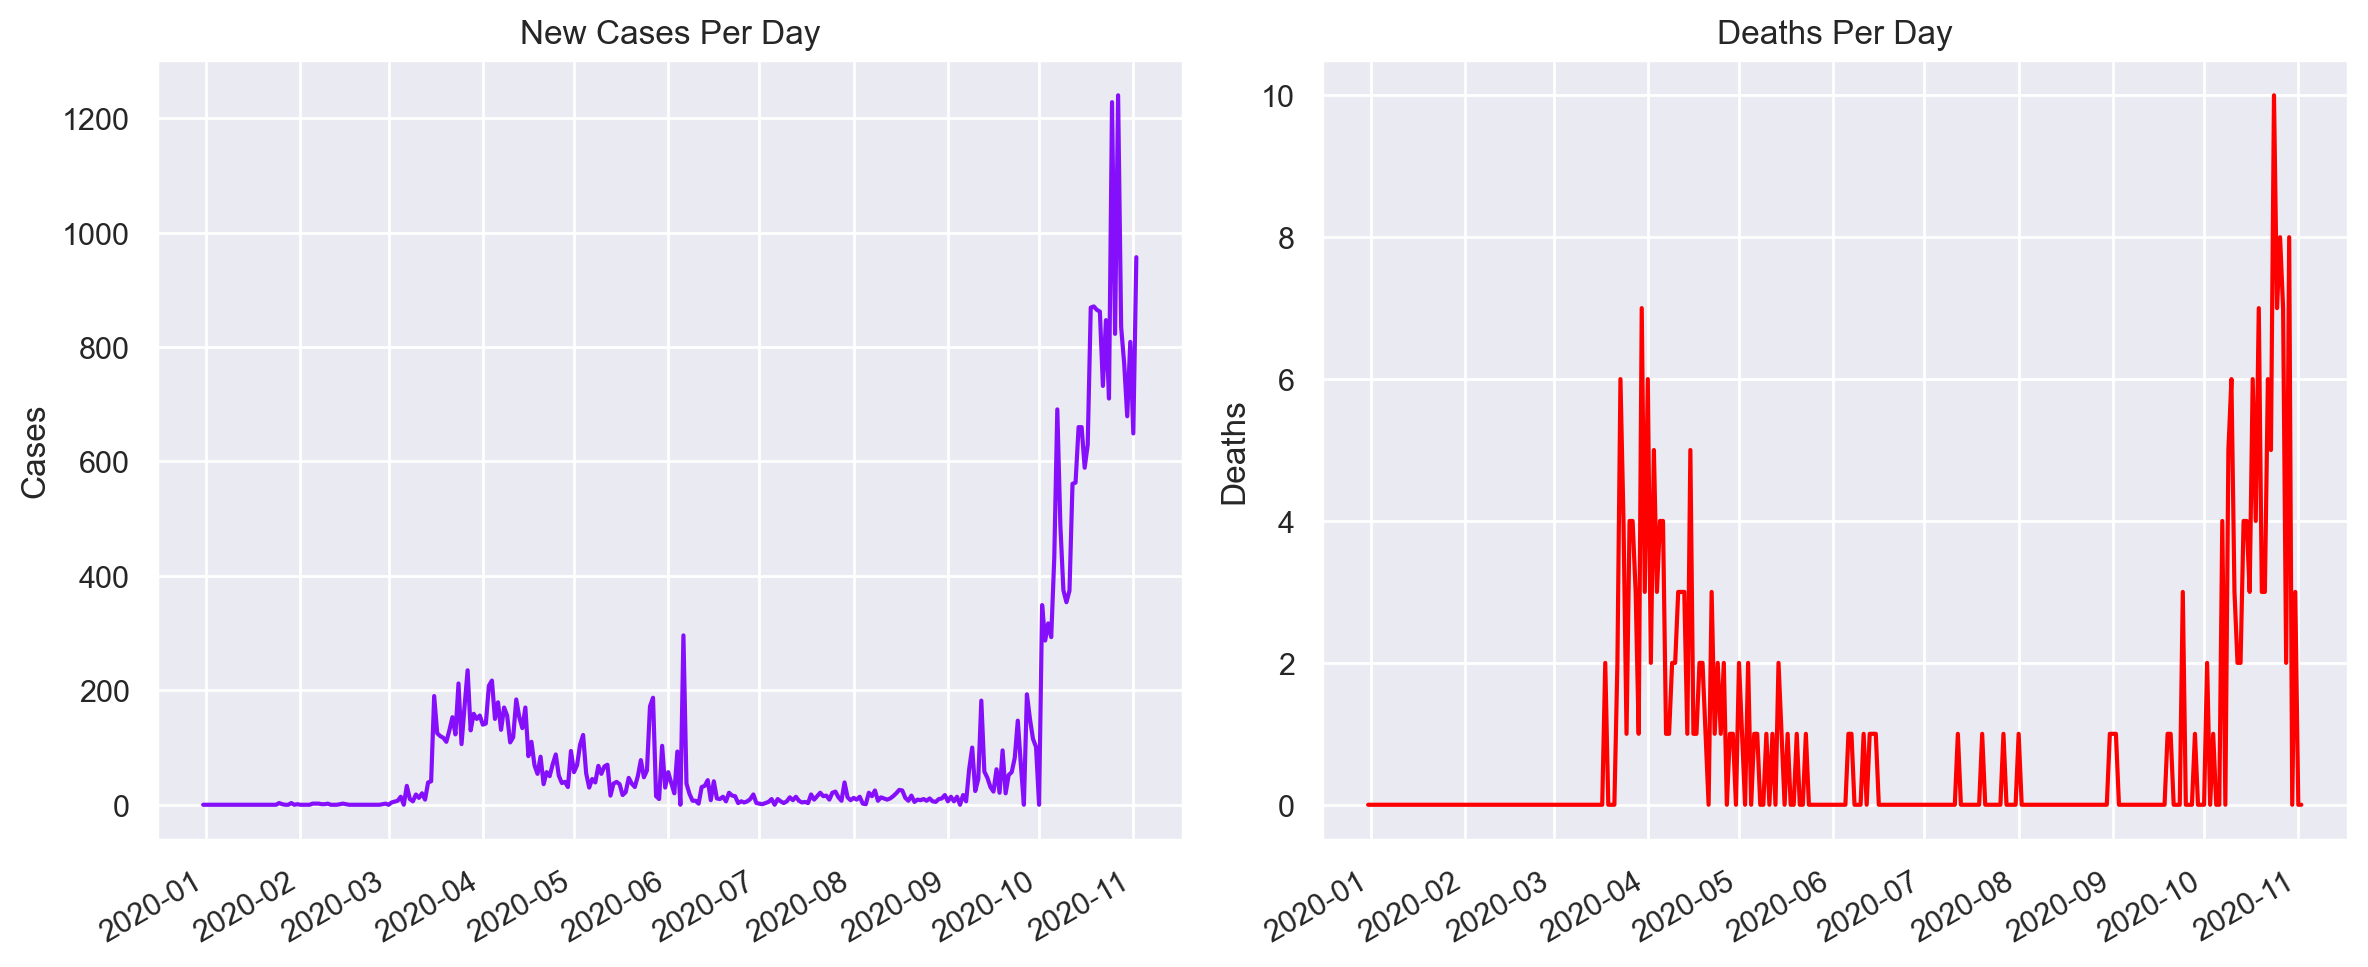

In [59]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=200)

axes[0].plot(bd_cases, label='Amount', color='#850ffa', lw=1.5, ls='-')
axes[1].plot(bd_deaths, label='Total Amount', color='#ff0000', lw=1.5, ls='-')

axes[0].set_title('New Cases Per Day')
axes[0].set_ylabel('Cases')

axes[1].set_title('Deaths Per Day')
axes[1].set_ylabel('Deaths')

plt.gcf().autofmt_xdate()

fig.tight_layout() 

### Combined View - 1

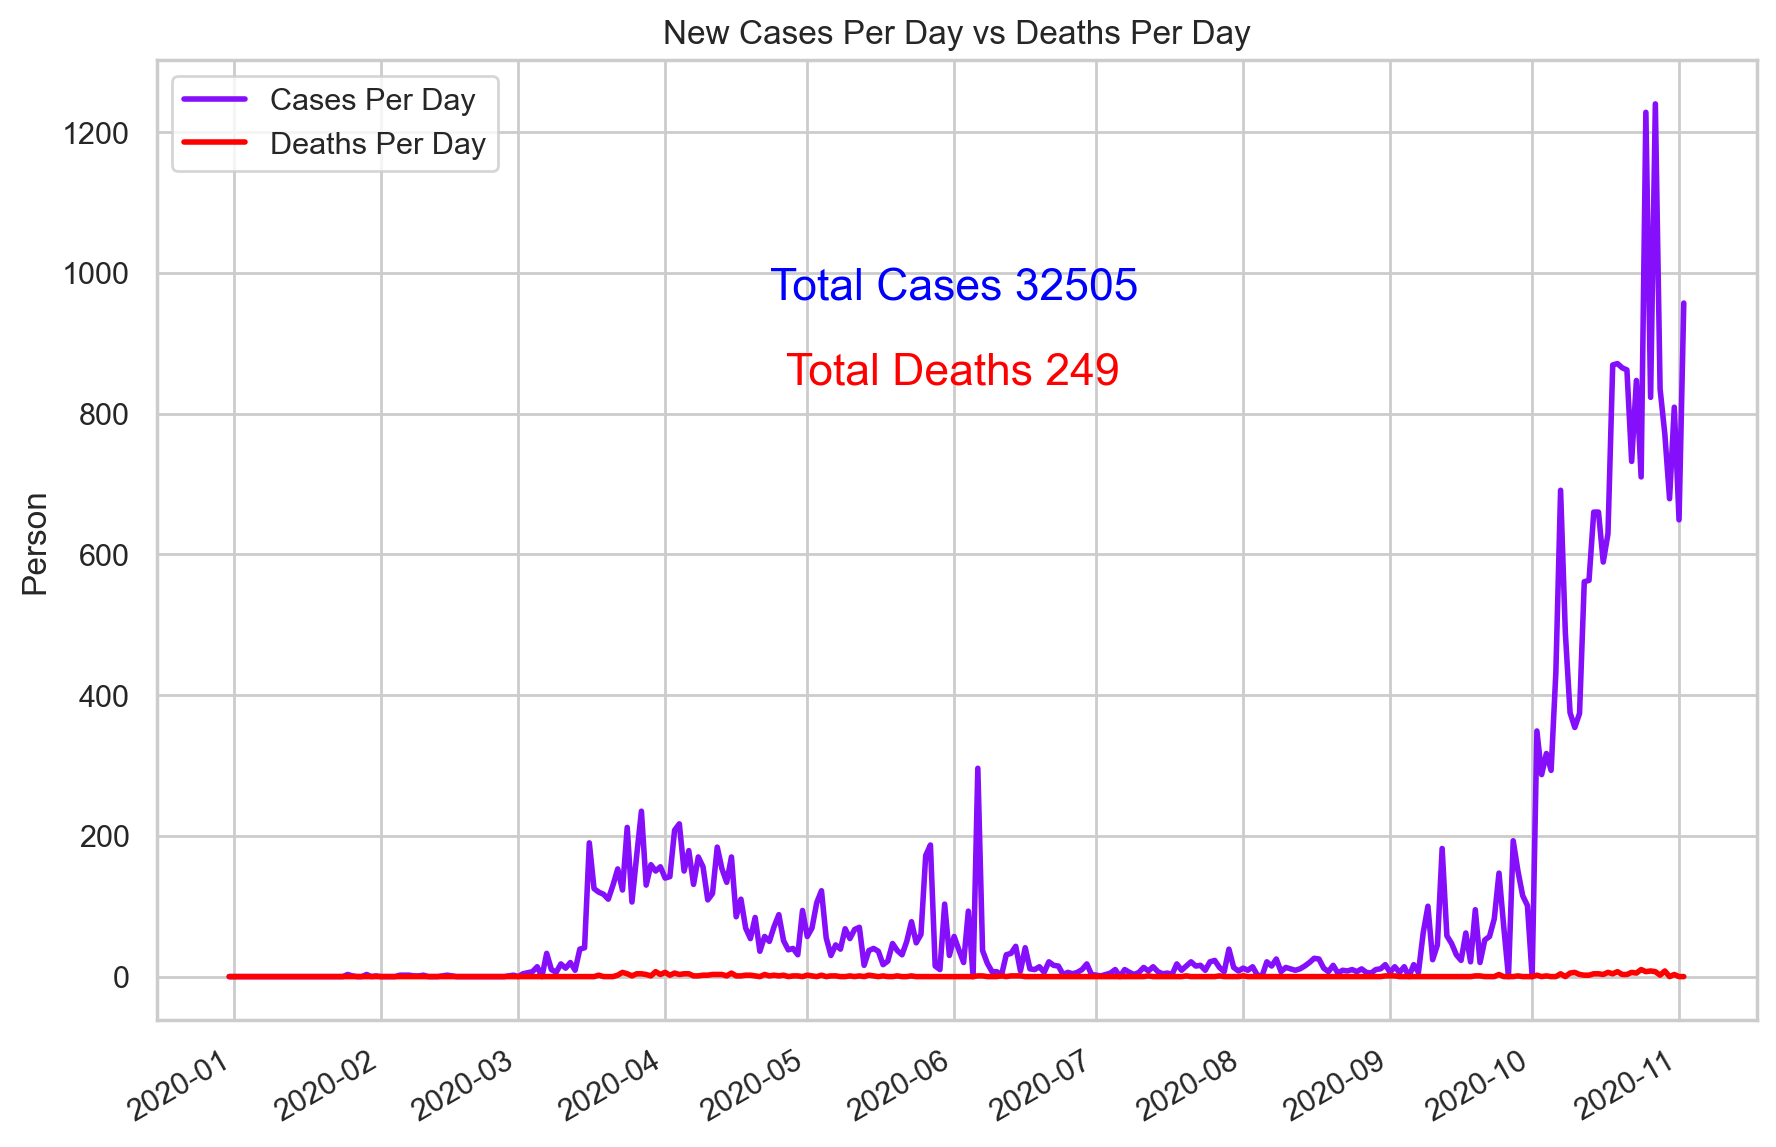

In [60]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='BuGn_r', 
        font='arial', 
        font_scale=1)

fig = plt.figure(figsize=(10, 6), dpi=200)

axes = fig.add_axes([.1, .1, .8, .8])

axes.plot(bd_cases, label='Cases Per Day', color='#850ffa', lw=2, ls='-')
axes.plot(bd_deaths, label='Deaths Per Day', color='#ff0000', lw=2, ls='-')

plt.title('New Cases Per Day vs Deaths Per Day')
plt.ylabel('Person')

case_res = 'Total Cases ' + str(sum(bd_cases))
to_dea = 'Total Deaths ' + str(sum(bd_deaths))

fig.text(0.407, 0.7, case_res, dict(size=16, color='blue'))
fig.text(0.415, 0.63, to_dea, dict(size=16, color='red'))

axes.legend()

plt.gcf().autofmt_xdate()

### Combined View - 2

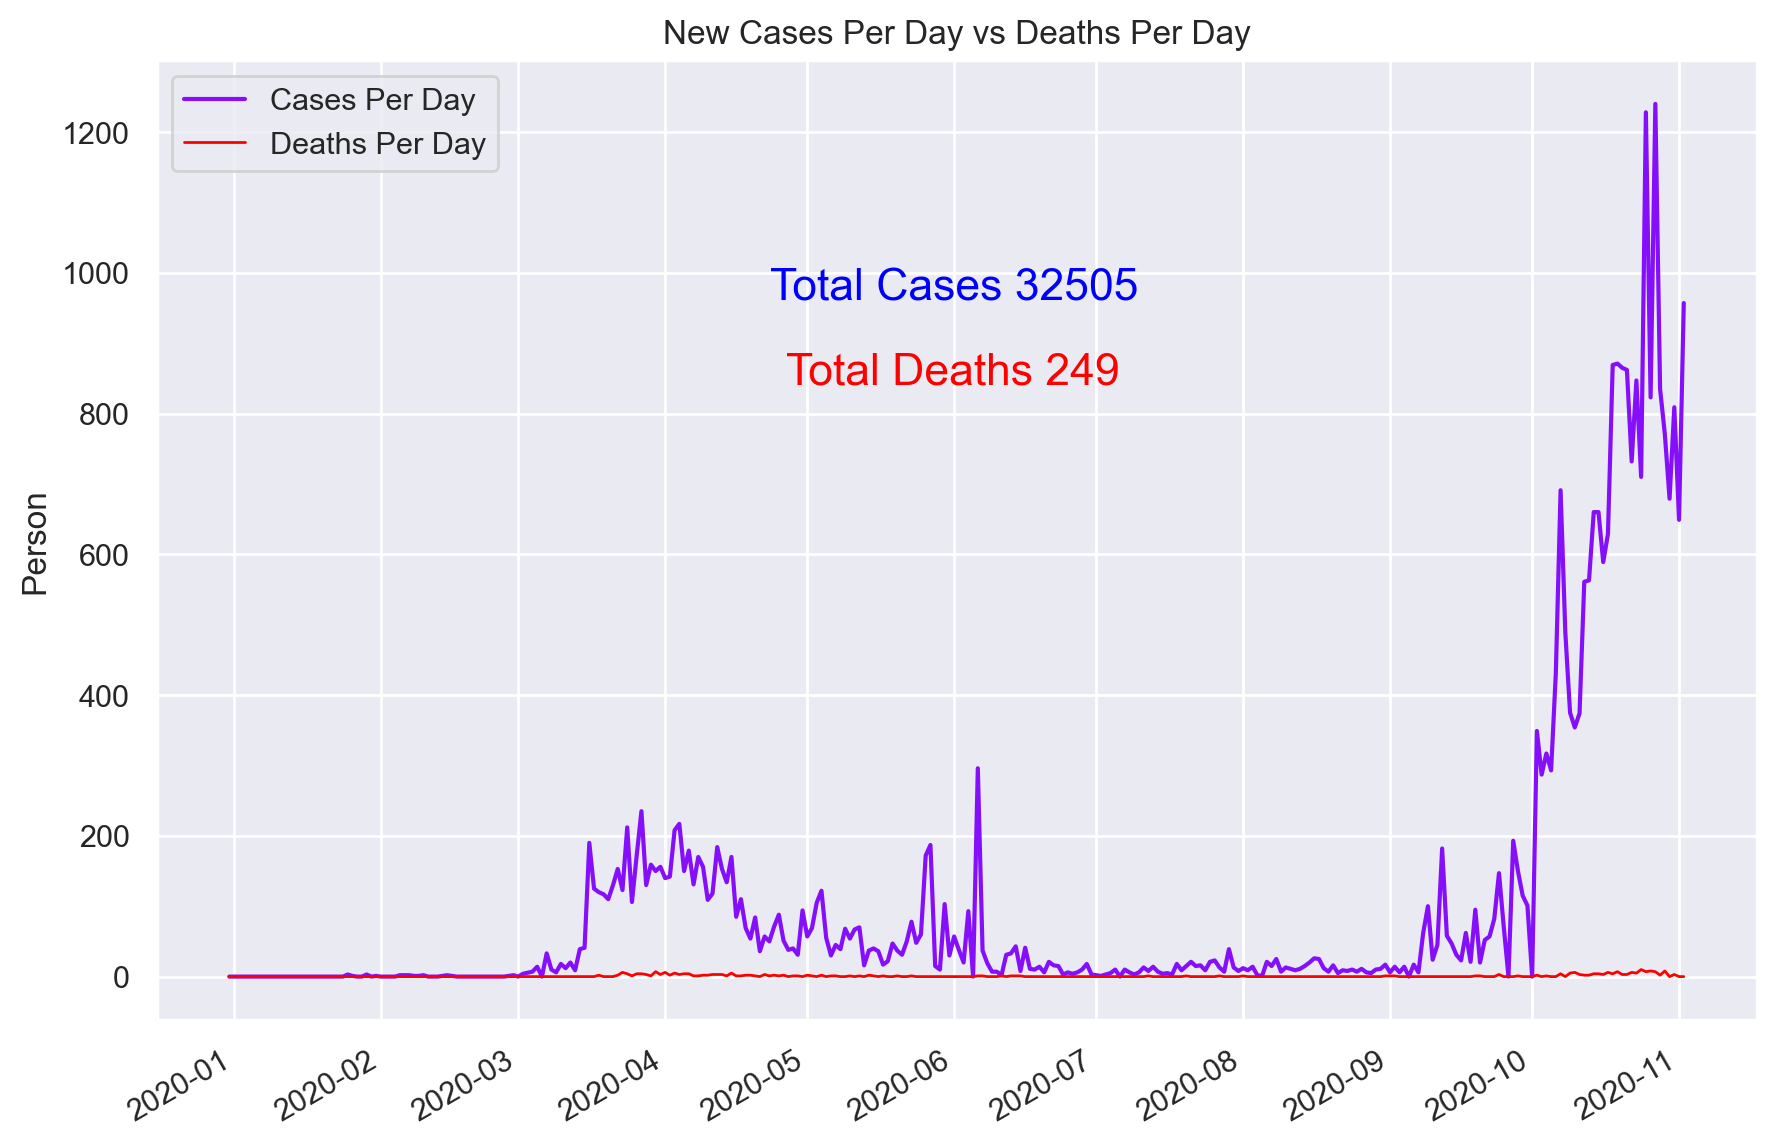

In [61]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(10, 6), dpi=200)

axes = fig.add_axes([.1, .1, .8, .8])

axes.plot(bd_cases, label='Cases Per Day', color='#850ffa', lw=1.5, ls='-')
axes.plot(bd_deaths, label='Deaths Per Day', color='#ff0000', lw=1, ls='-')

plt.title('New Cases Per Day vs Deaths Per Day')
plt.ylabel('Person')

case_res = 'Total Cases ' + str(sum(bd_cases))
to_dea = 'Total Deaths ' + str(sum(bd_deaths))

fig.text(0.407, 0.7, case_res, dict(size=16, color='blue'))
fig.text(0.415, 0.63, to_dea, dict(size=16, color='red'))

axes.legend()

plt.gcf().autofmt_xdate()

# Total Cases Vs Total Deaths

In [62]:
bd_cases_cum = bd_cases.cumsum()
bd_deaths_cum = bd_deaths.cumsum()

### View - 1

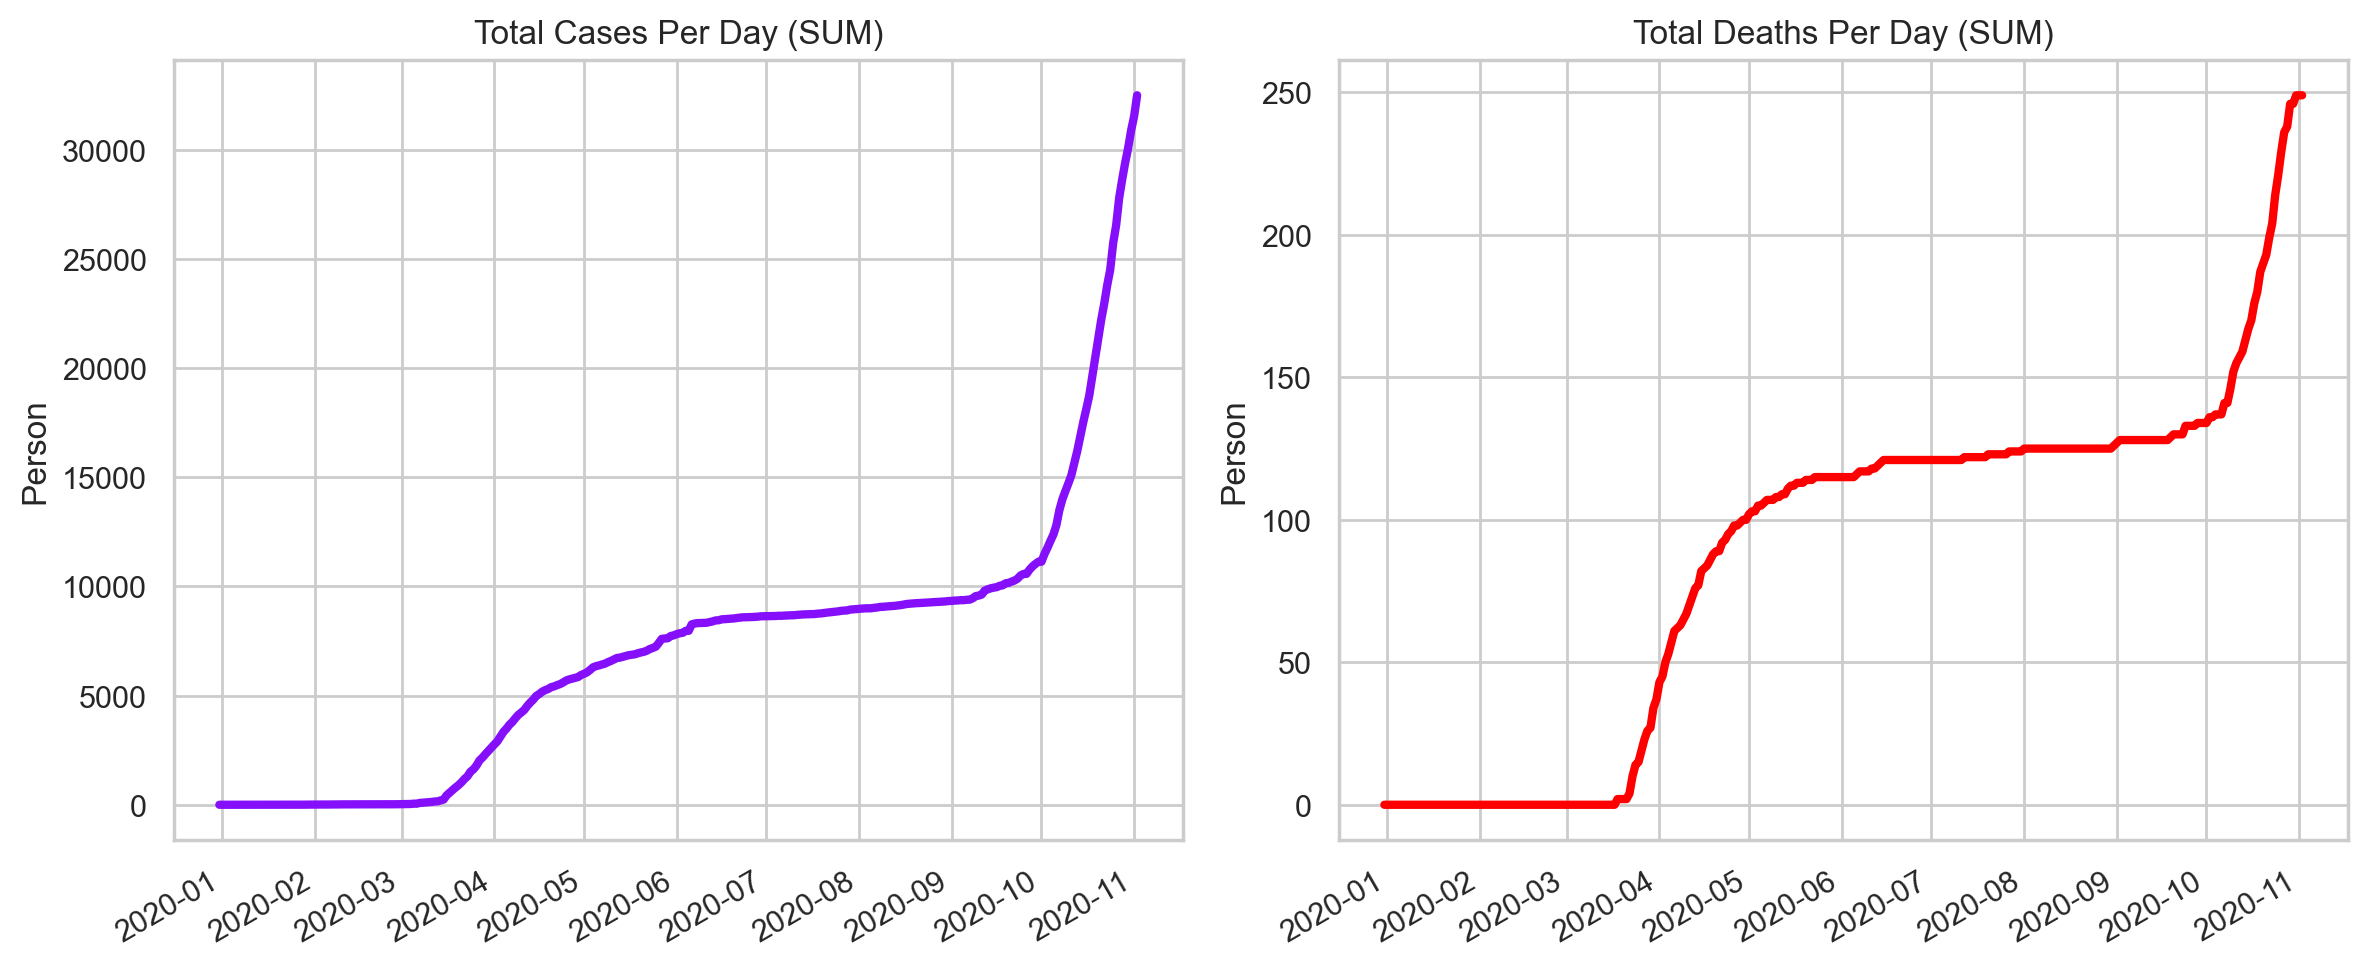

In [63]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='BuGn_r', 
        font='arial', 
        font_scale=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=200)

axes[0].plot(bd_cases_cum, label='Amount', color='#850ffa', lw=3, ls='-')
axes[1].plot(bd_deaths_cum, label='Total Amount', color='#ff0000', lw=3, ls='-')

axes[0].set_title('Total Cases Per Day (SUM)')
axes[0].set_ylabel('Person')

axes[1].set_title('Total Deaths Per Day (SUM)')
axes[1].set_ylabel('Person')

plt.gcf().autofmt_xdate()

fig.tight_layout() 

### Combined View - 1

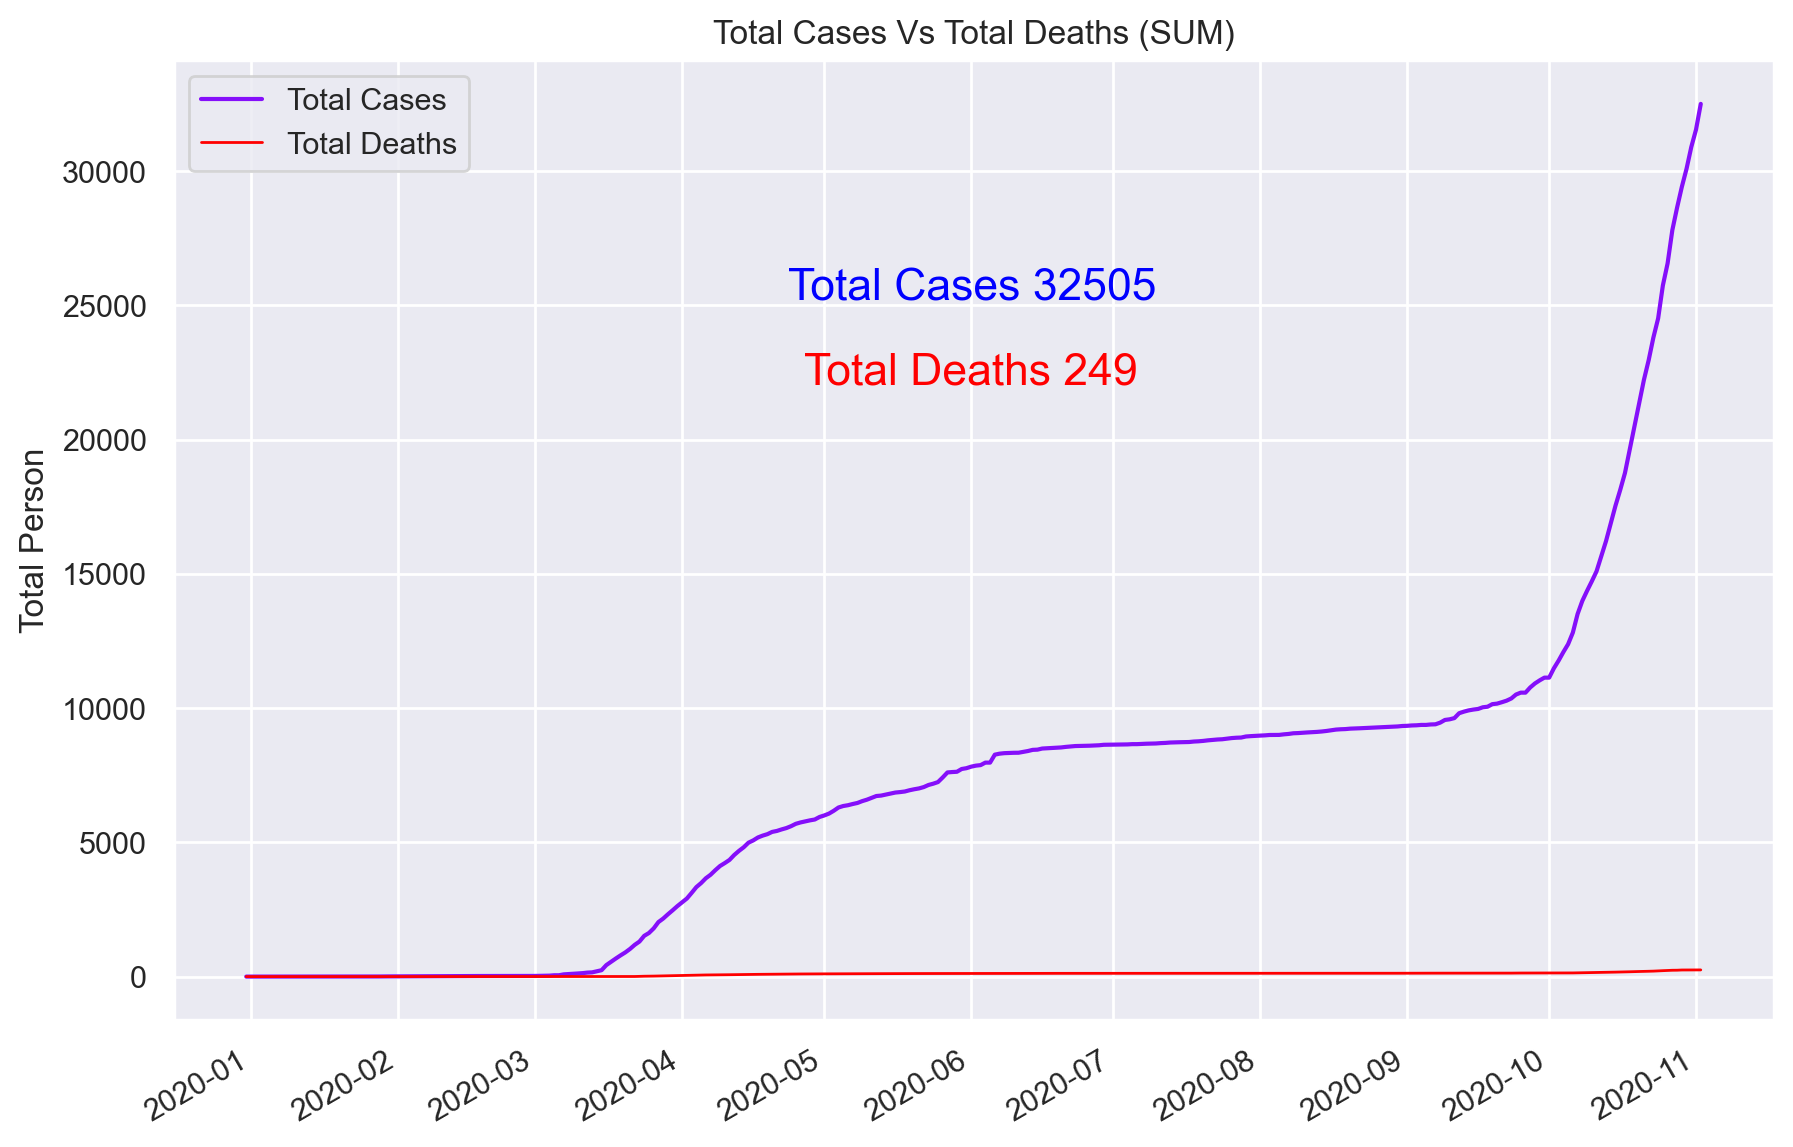

In [64]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(10, 6), dpi=200)

axes = fig.add_axes([.1, .1, .8, .8])

axes.plot(bd_cases_cum, label='Total Cases', color='#850ffa', lw=1.5, ls='-')
axes.plot(bd_deaths_cum, label='Total Deaths', color='#ff0000', lw=1, ls='-')

plt.title('Total Cases Vs Total Deaths (SUM)')
plt.ylabel('Total Person')

case_res = 'Total Cases ' + str(sum(bd_cases))
to_dea = 'Total Deaths ' + str(sum(bd_deaths))

fig.text(0.407, 0.7, case_res, dict(size=16, color='blue'))
fig.text(0.415, 0.63, to_dea, dict(size=16, color='red'))

axes.legend()

plt.gcf().autofmt_xdate()

# New Cases Per Day

In [65]:
sns.set()

In [66]:
bd_deaths

dateRep
2019-12-31    0
2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
             ..
2020-10-29    8
2020-10-30    0
2020-10-31    3
2020-11-01    0
2020-11-02    0
Name: deaths, Length: 307, dtype: int64

In [67]:
bd_deaths.index

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01', '2020-11-02'],
              dtype='datetime64[ns]', name='dateRep', length=307, freq=None)

In [68]:
bd_deaths.values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,  6,  4,  1,
        4,  4,  3,  1,  7,  3,  6,  2,  5,  3,  4,  4,  1,  1,  2,  2,  3,
        3,  3,  1,  5,  1,  1,  2,  2,  1,  0,  3,  1,  2,  1,  2,  0,  1,
        1,  0,  2,  1,  0,  2,  0,  1,  1,  0,  0,  1,  0,  1,  0,  2,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### View - 1

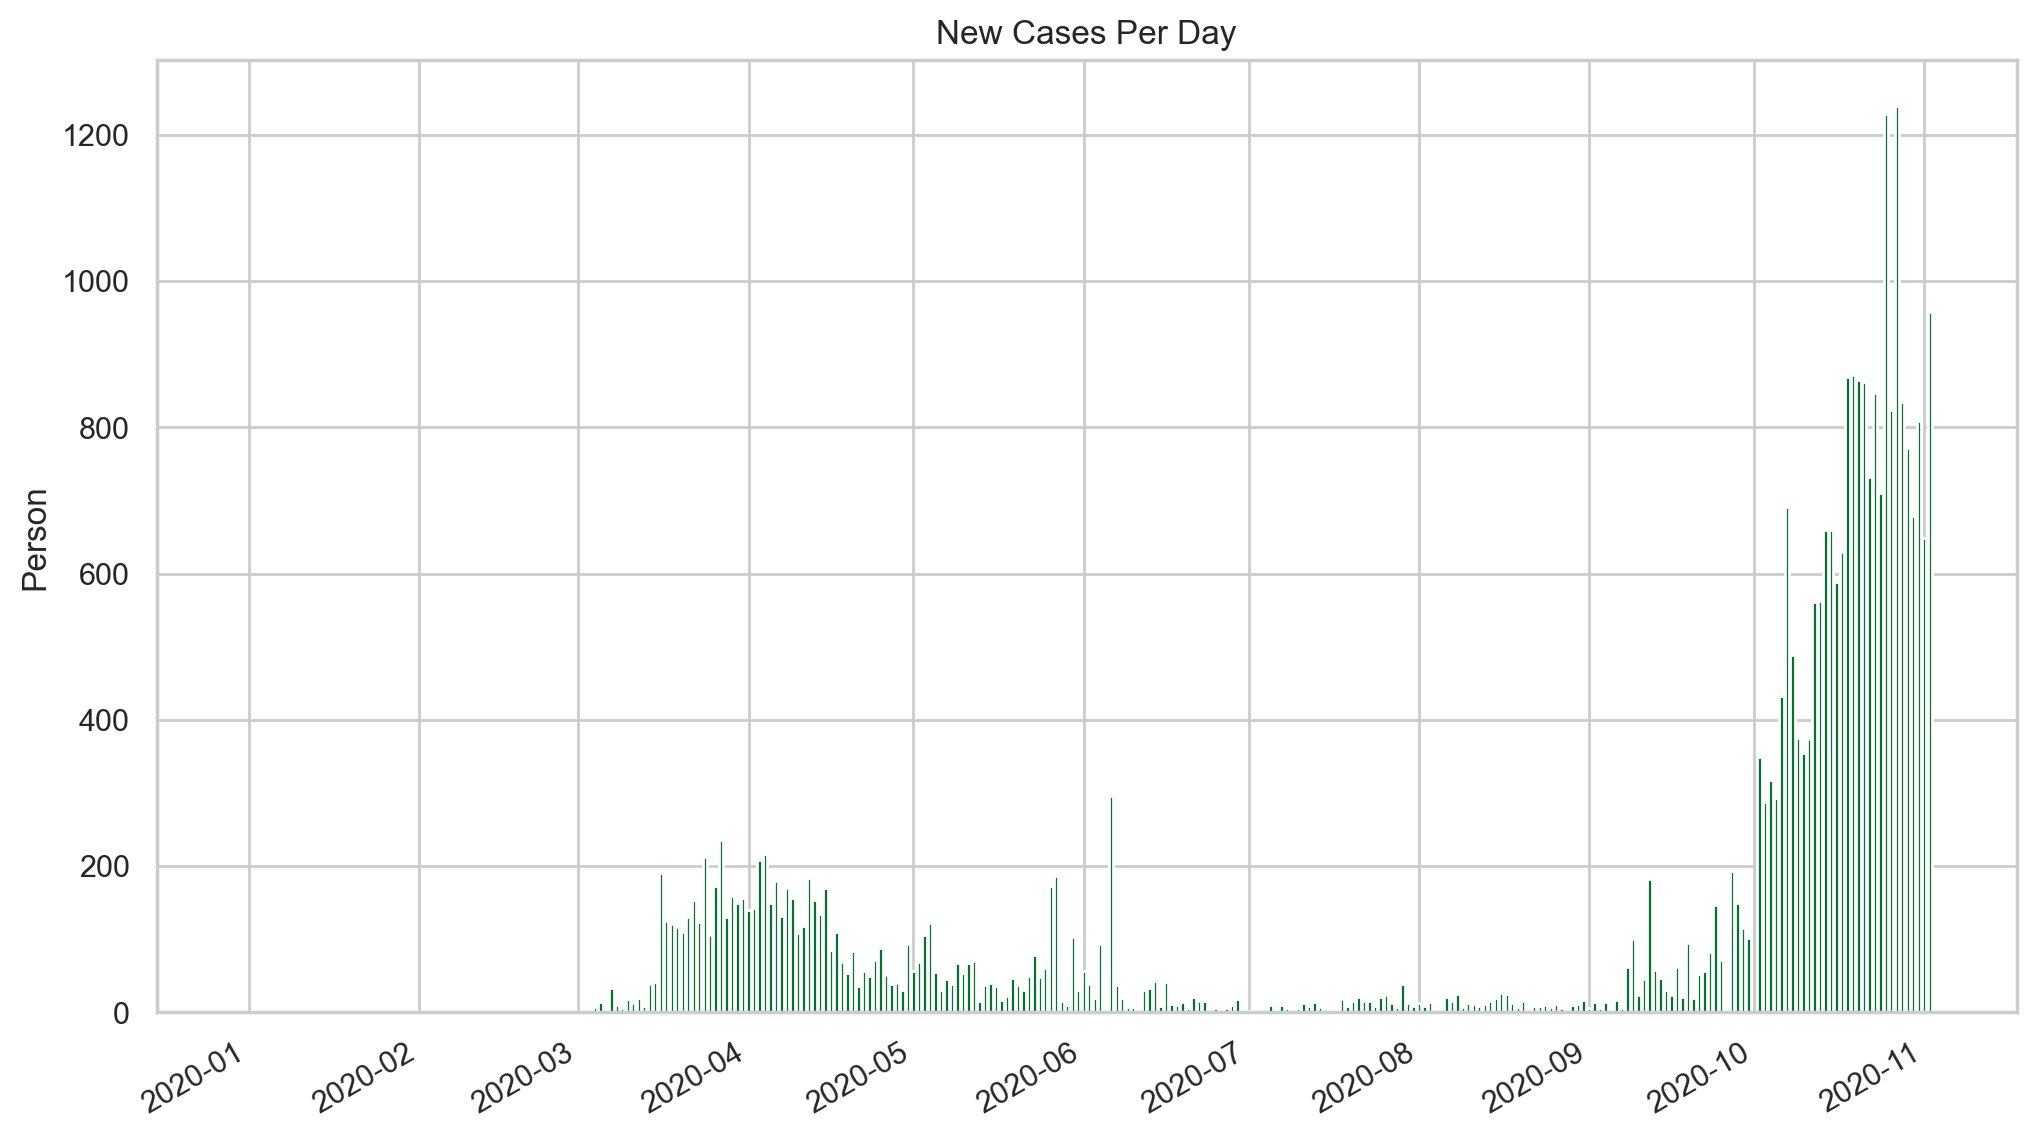

In [69]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='BuGn_r', 
        font='arial', 
        font_scale=1)

fig, axes = plt.subplots(figsize=(12, 7), dpi=200)


axes.bar(bd_cases.index, bd_cases.values)
plt.title('New Cases Per Day')
plt.ylabel('Person')

plt.gcf().autofmt_xdate()

### View - 2

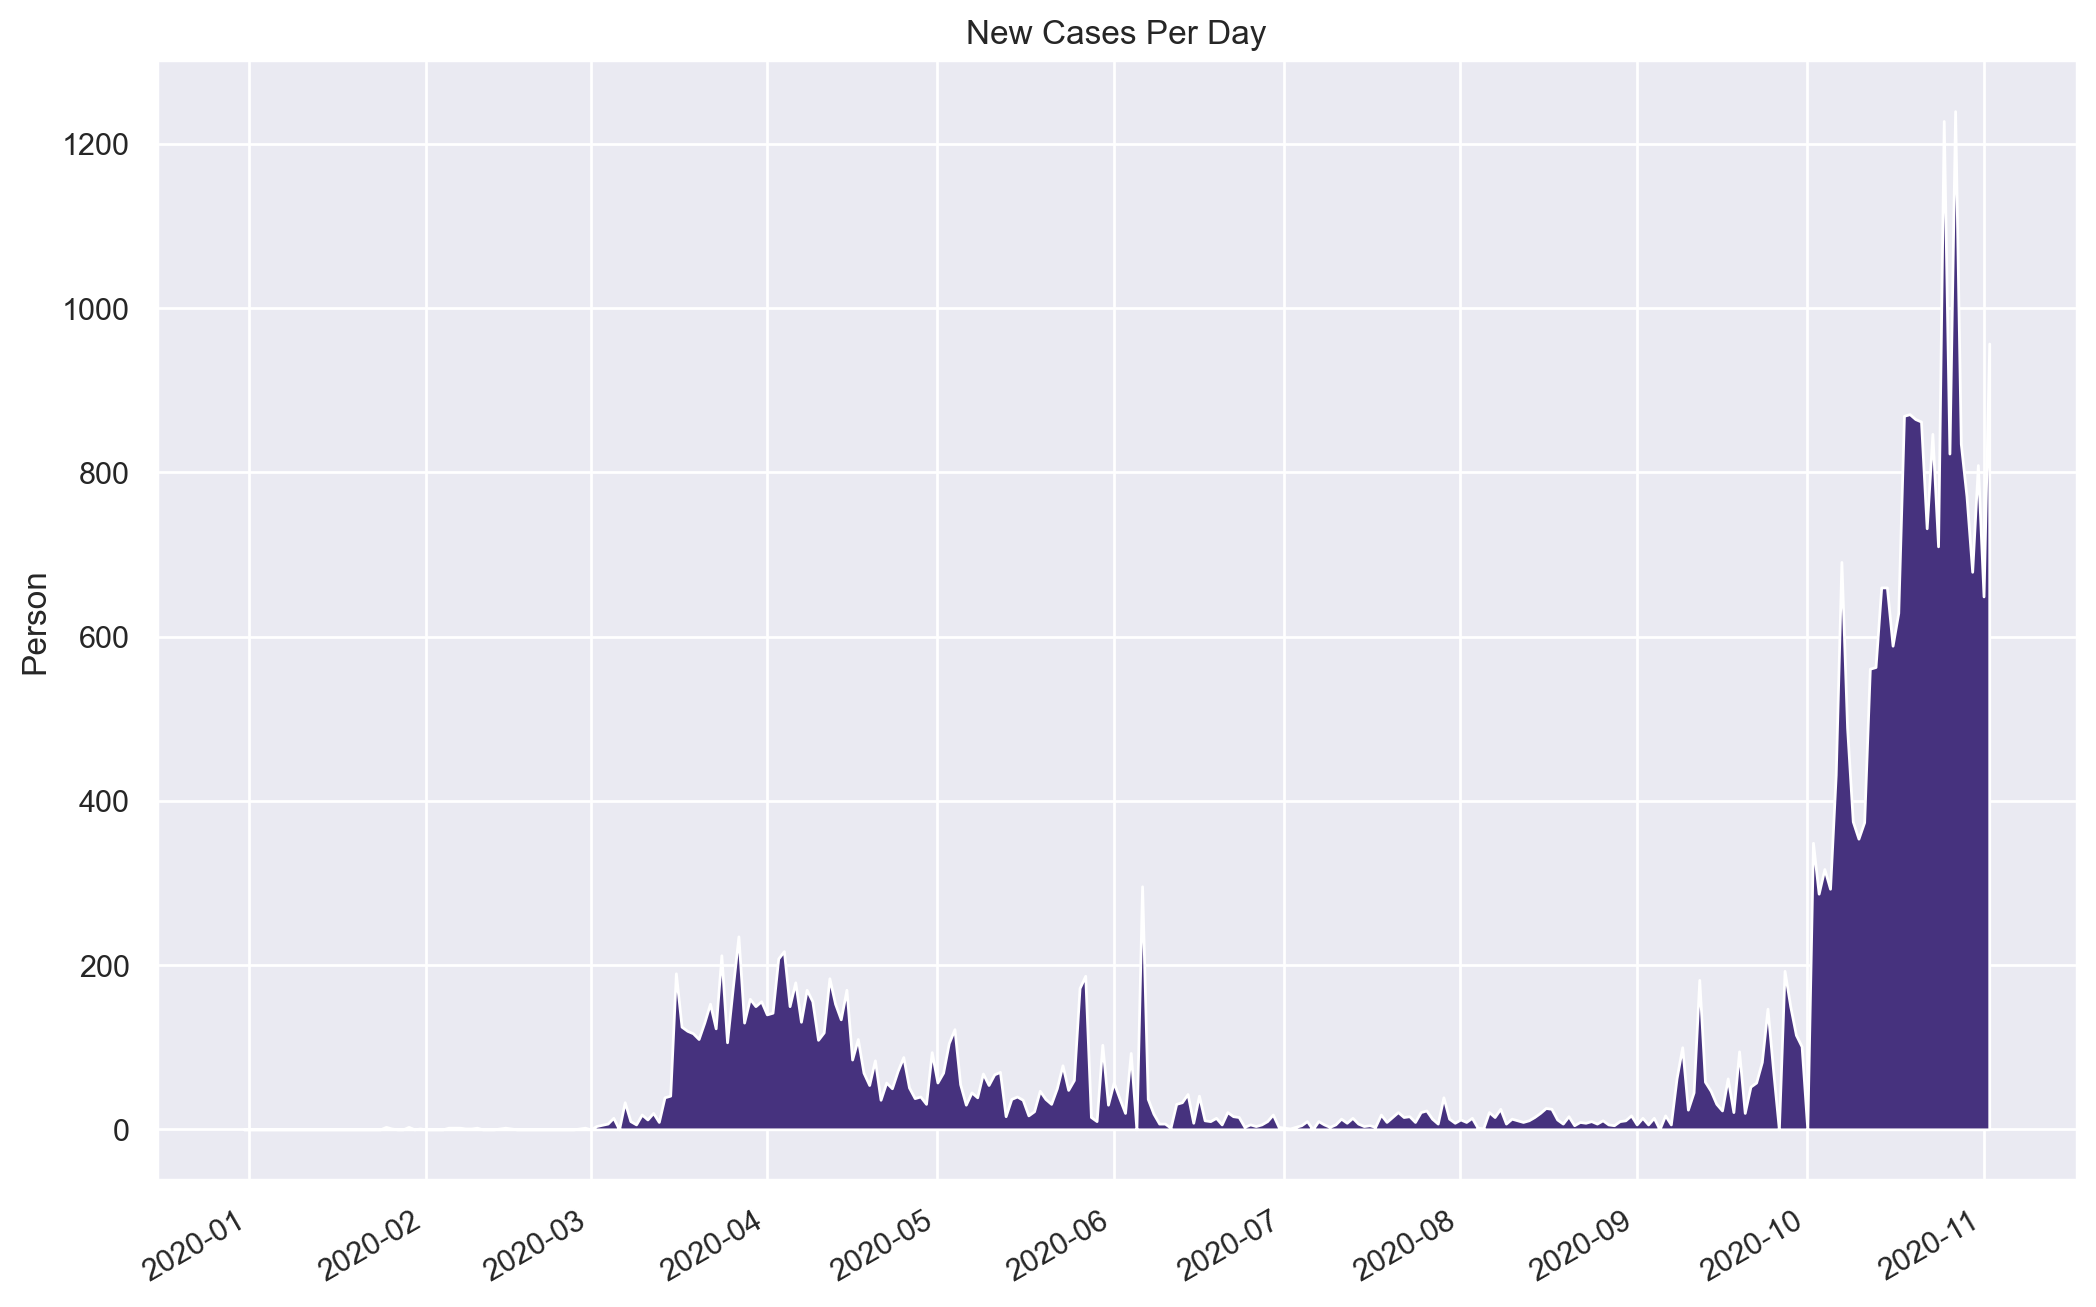

In [70]:
sns.set(context='notebook', 
        style='darkgrid', 
        palette='viridis', 
        font='arial', 
        font_scale=1)

fig = plt.figure(figsize=(12, 7), dpi=200)

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.fill_between(bd_cases.index, bd_cases.values)
plt.title('New Cases Per Day')
plt.ylabel('Person')

plt.gcf().autofmt_xdate()

# New Deaths Per Day

### View - 1

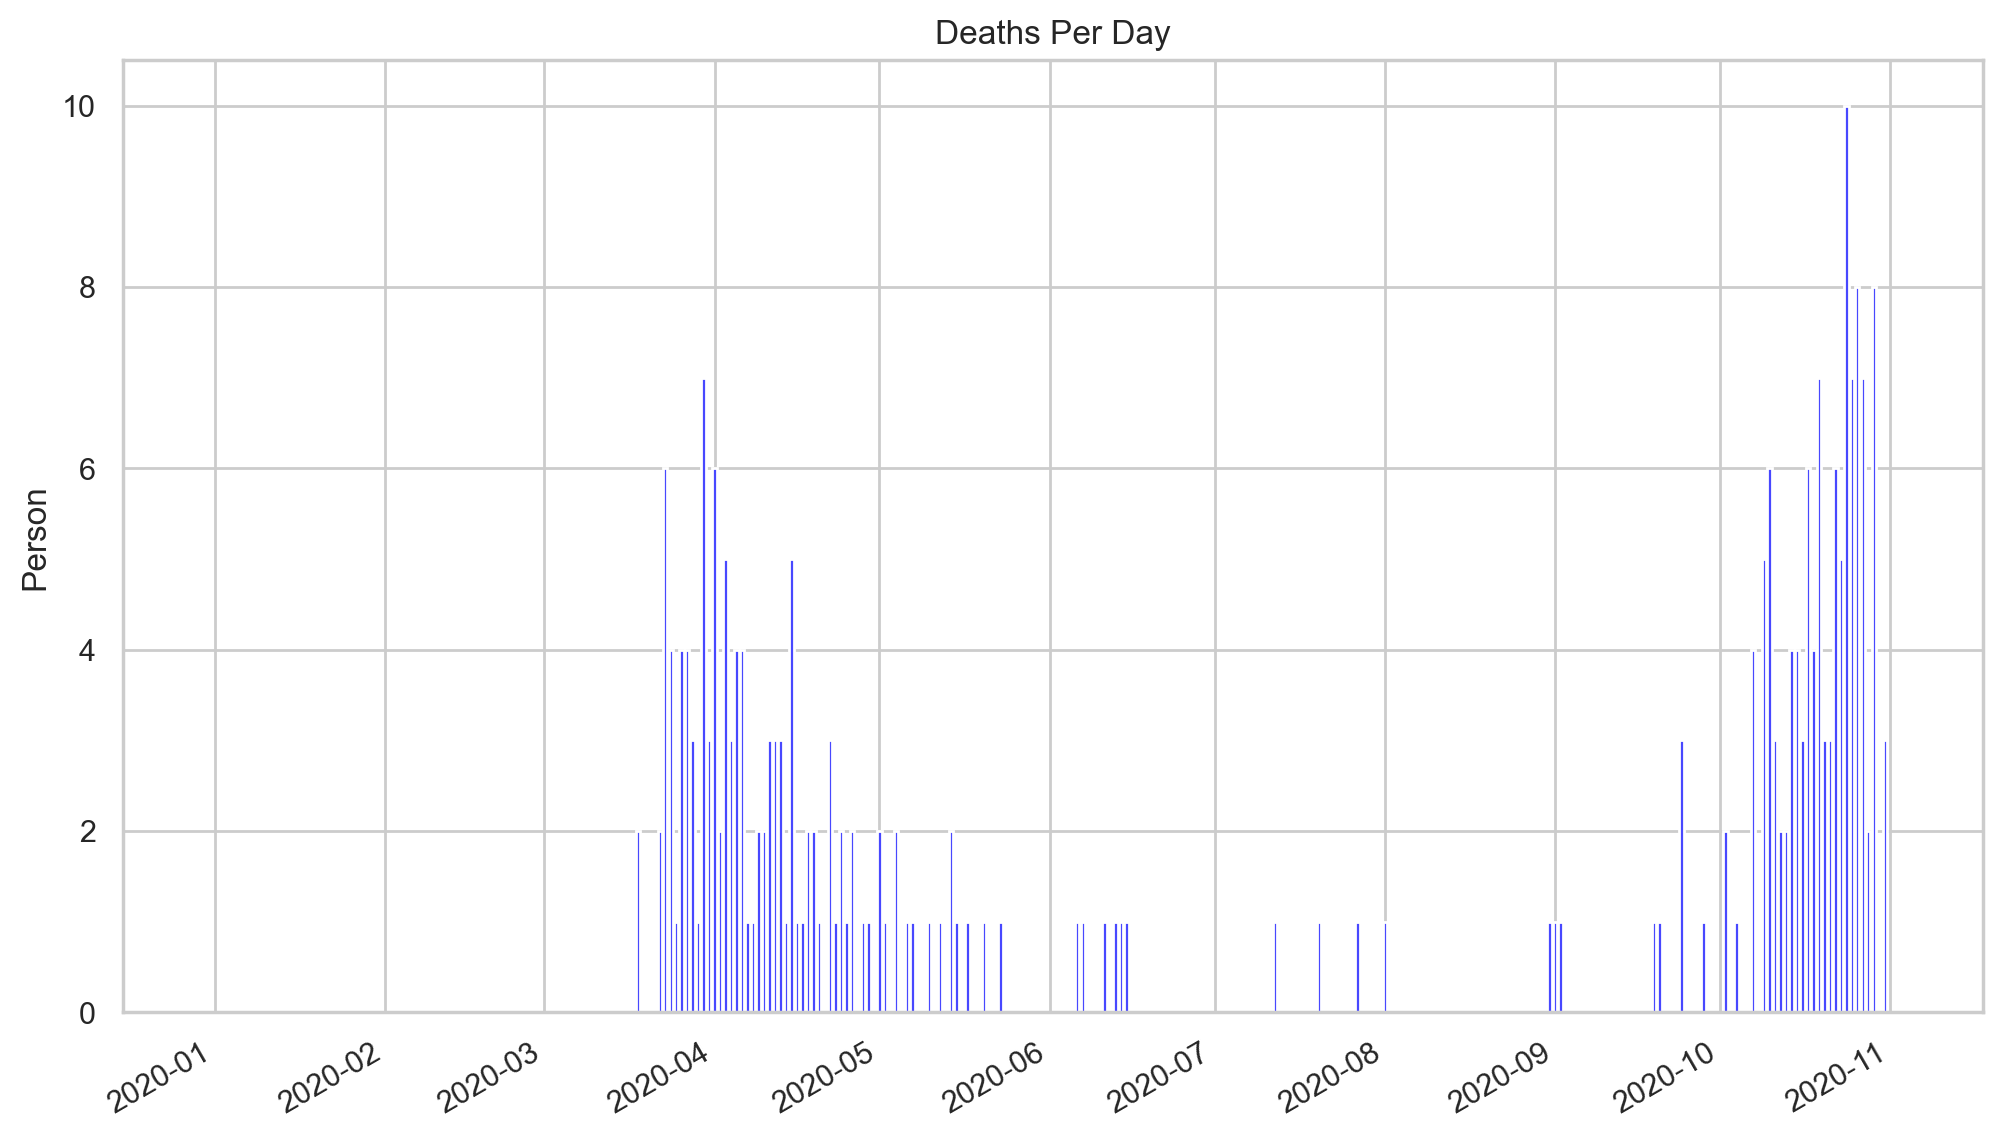

In [71]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='bwr', 
        font='arial', 
        font_scale=1)

fig, axes = plt.subplots(figsize=(12, 7), dpi=200)

axes.bar(bd_deaths.index, bd_deaths.values)
plt.title('Deaths Per Day')
plt.ylabel('Person')

plt.gcf().autofmt_xdate()

### View - 2

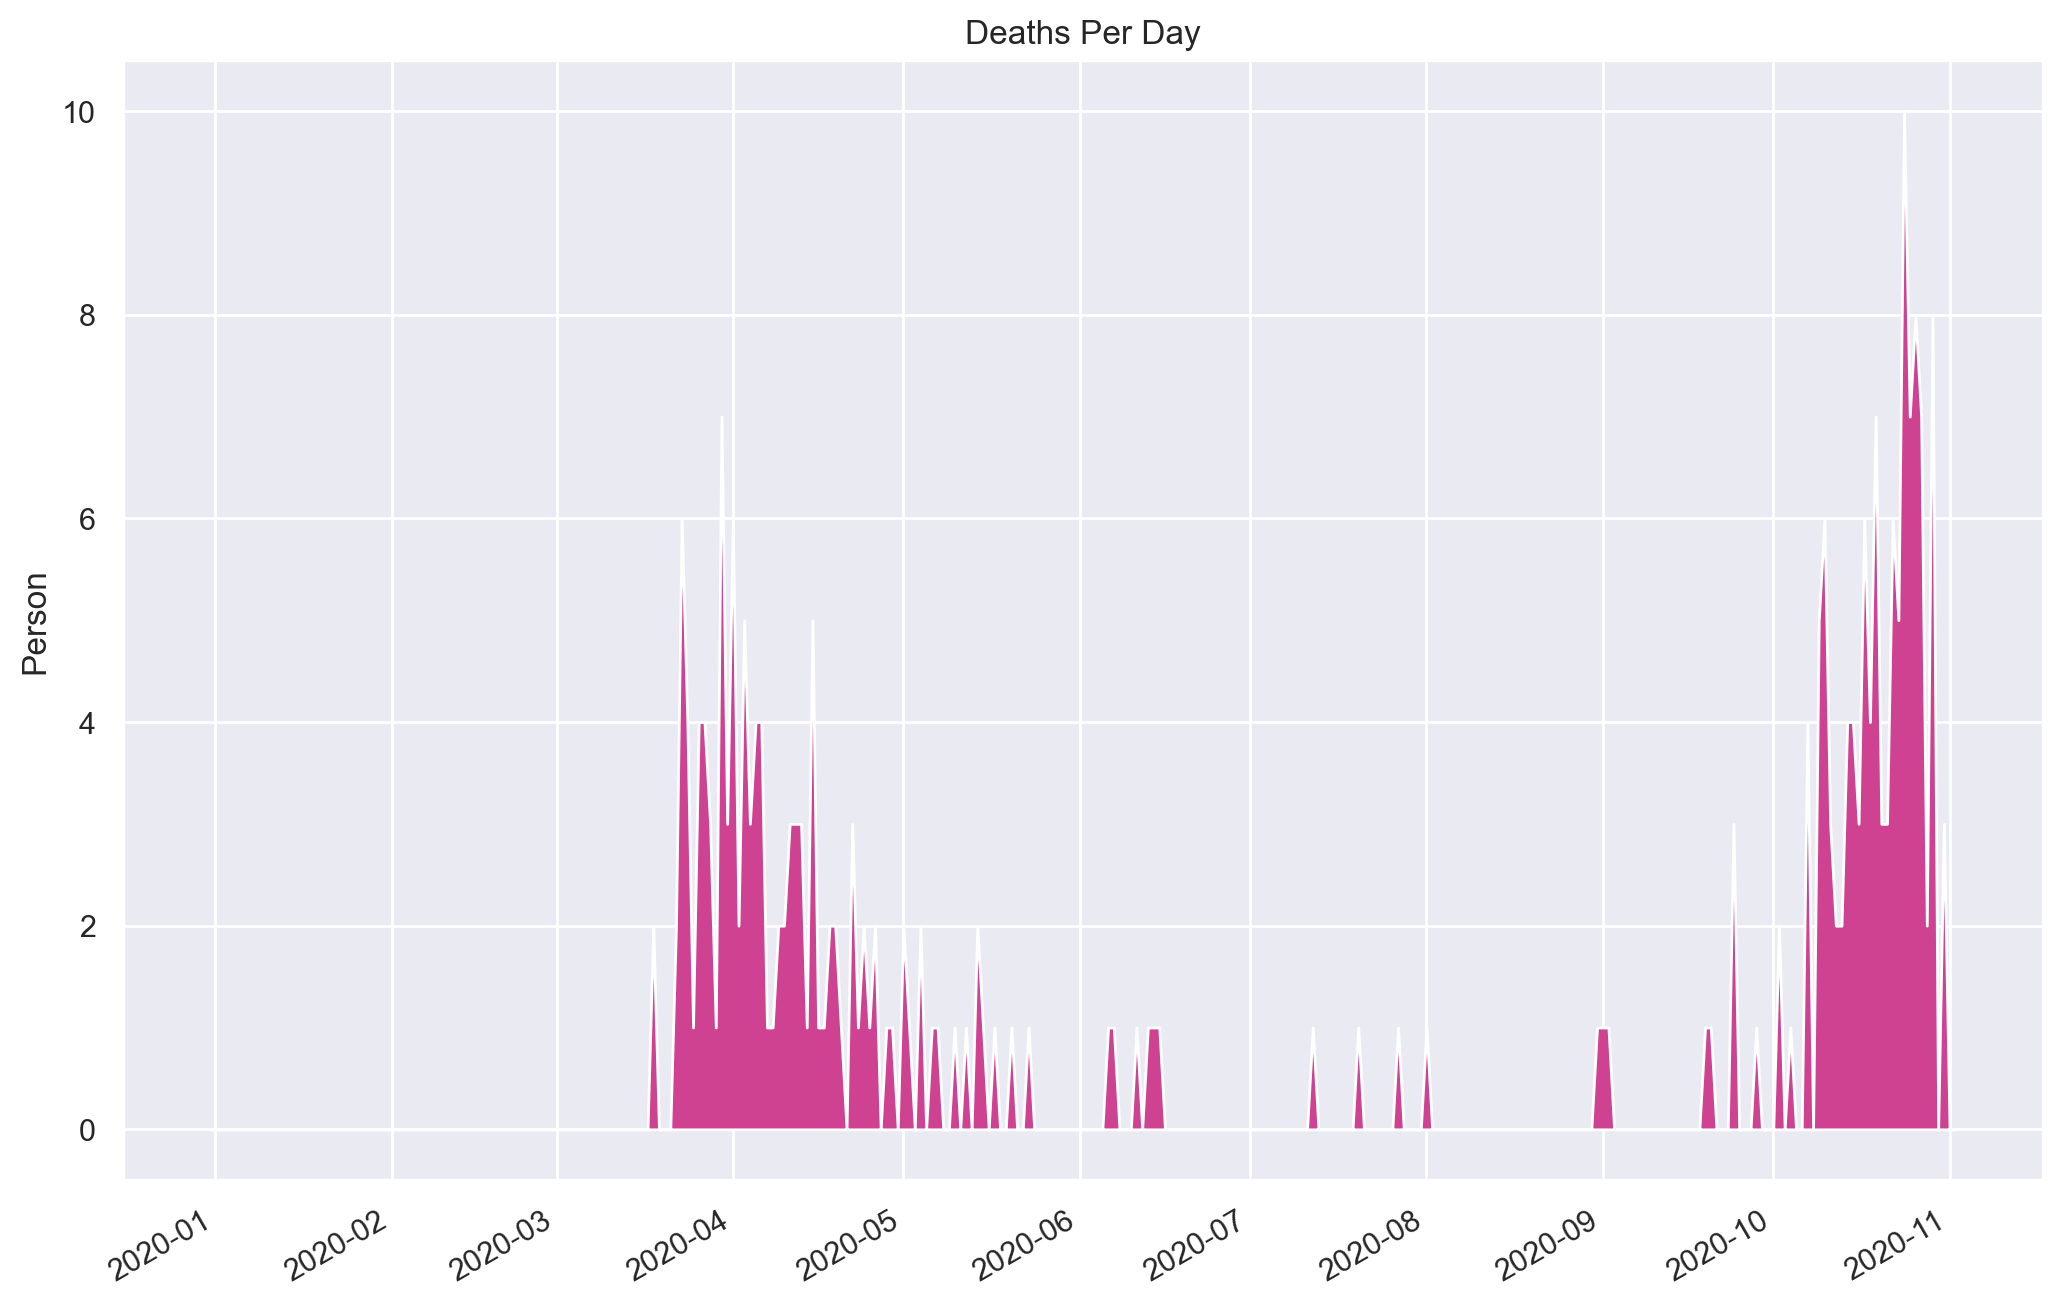

In [72]:
sns.set(context='notebook', 
        style='dark', 
        palette='PiYG', 
        font='arial', 
        font_scale=1)

fig = plt.figure(figsize=(12, 7), dpi=200)

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.fill_between(bd_deaths.index, bd_deaths.values)
plt.title('Deaths Per Day')
plt.ylabel('Person')

plt.gcf().autofmt_xdate()
plt.grid()

# Total Cases

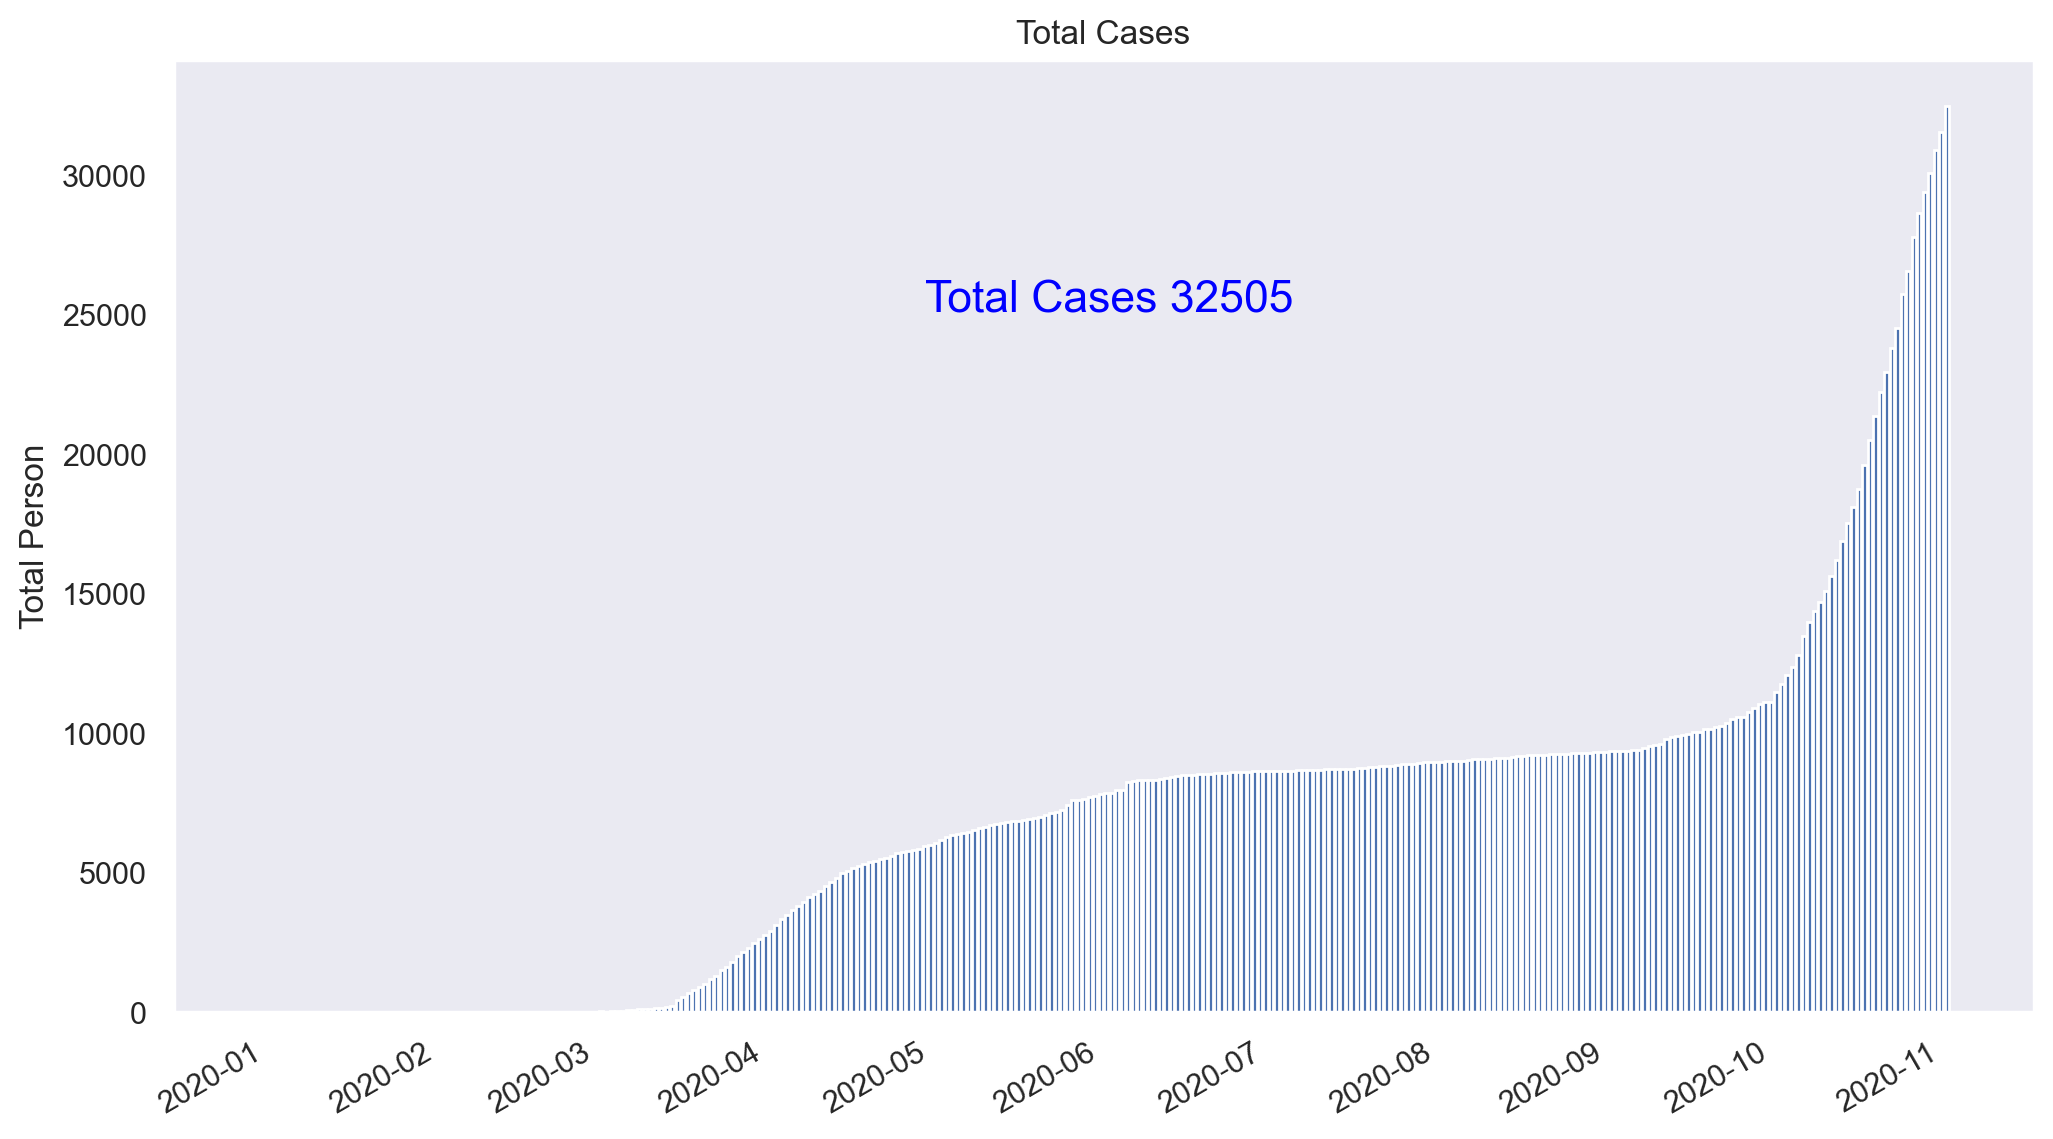

In [73]:
sns.set()

fig, axes = plt.subplots(figsize=(12, 7), dpi=200)

axes.bar(bd_cases.index, bd_cases.values.cumsum())
plt.title('Total Cases')
plt.ylabel('Total Person')

case_res = 'Total Cases ' + str(sum(bd_cases))

fig.text(0.438, 0.7, case_res, dict(size=16, color='blue'))

plt.gcf().autofmt_xdate()
plt.grid()

# Total Deaths

### View - 1

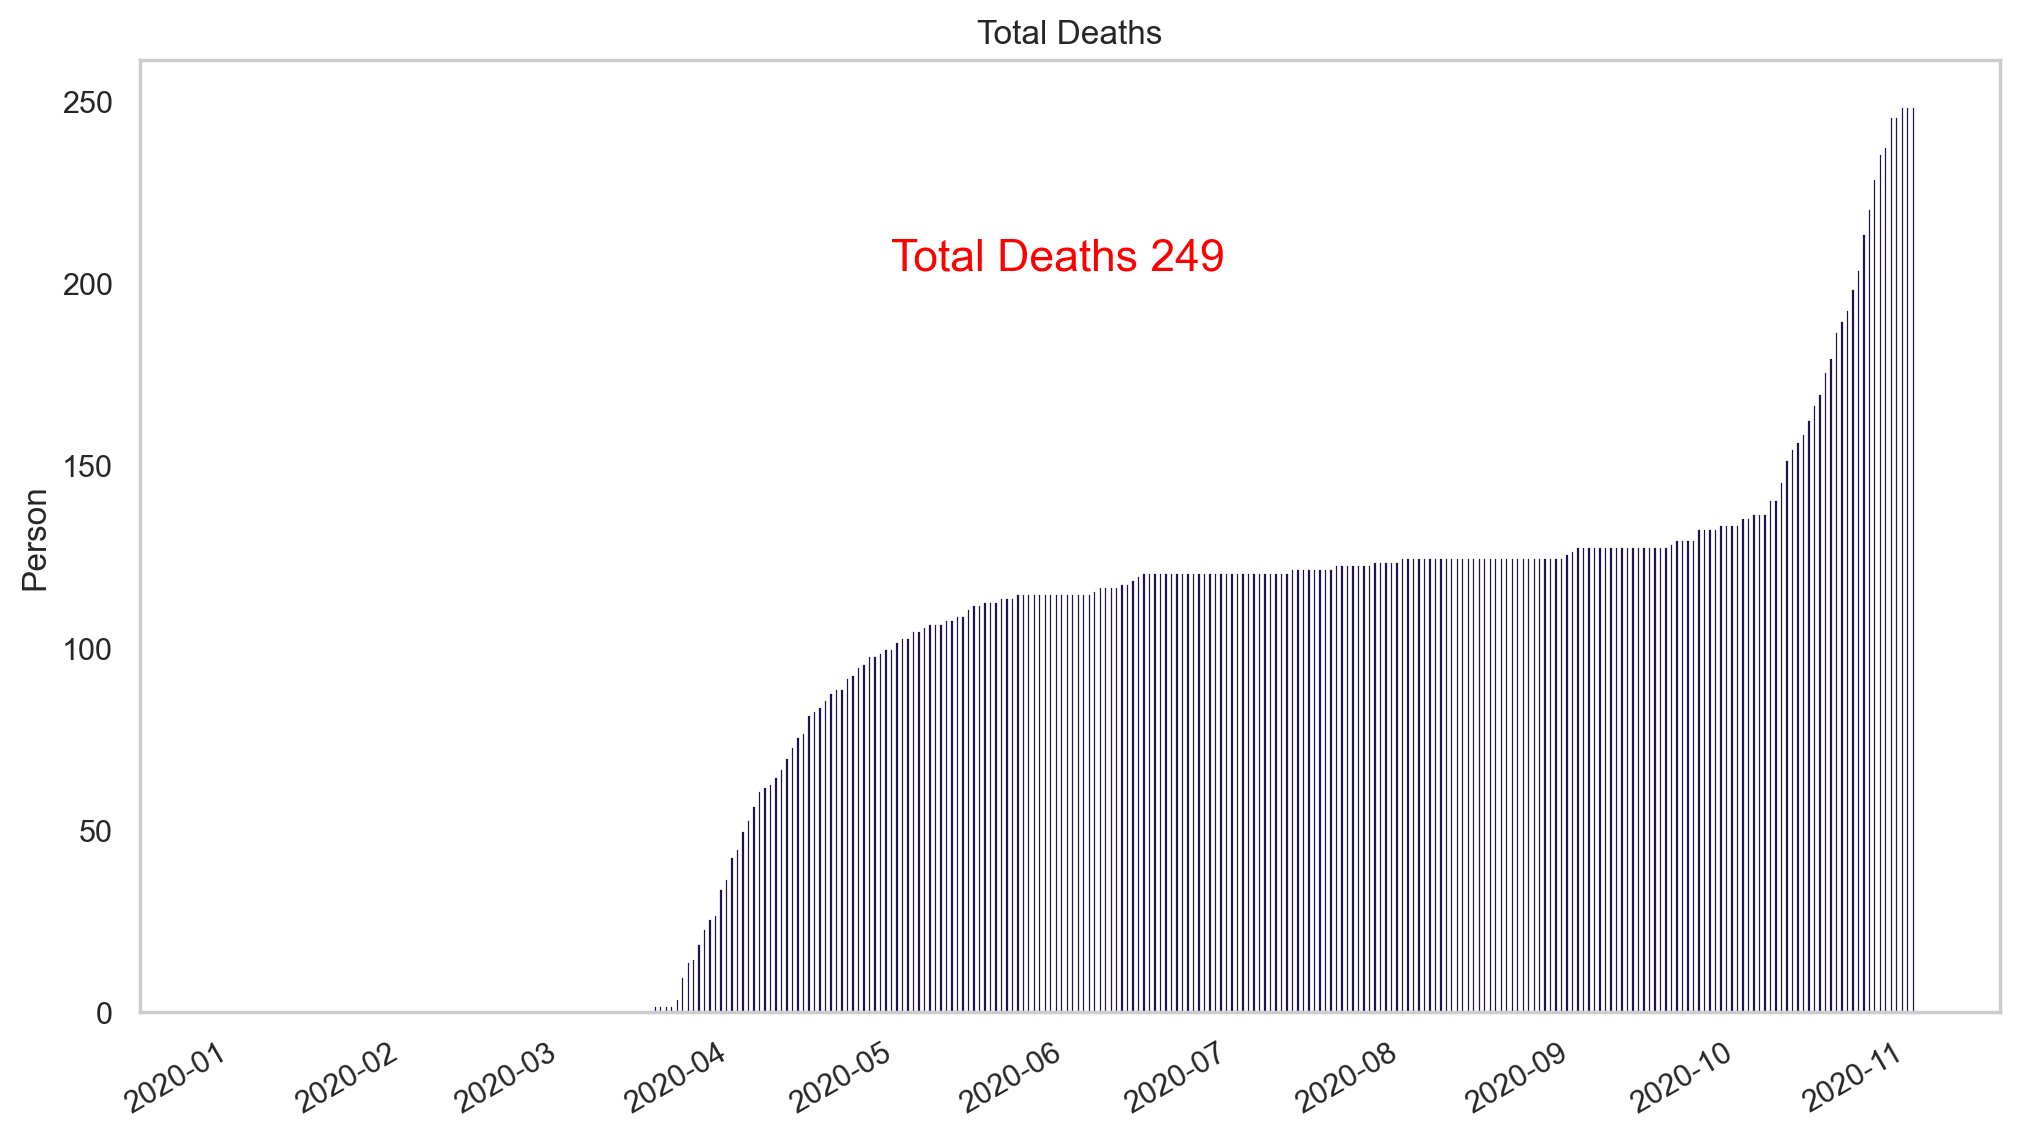

In [74]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='magma', 
        font='arial', 
        font_scale=1)

fig, axes = plt.subplots(figsize=(12, 7), dpi=200)

axes.bar(bd_deaths.index, bd_deaths.values.cumsum())
plt.title('Total Deaths')
plt.ylabel('Person')

to_dea = 'Total Deaths ' + str(sum(bd_deaths))

fig.text(0.438, 0.73, to_dea, dict(size=16, color='red'))

plt.gcf().autofmt_xdate()
plt.grid()

### View - 2

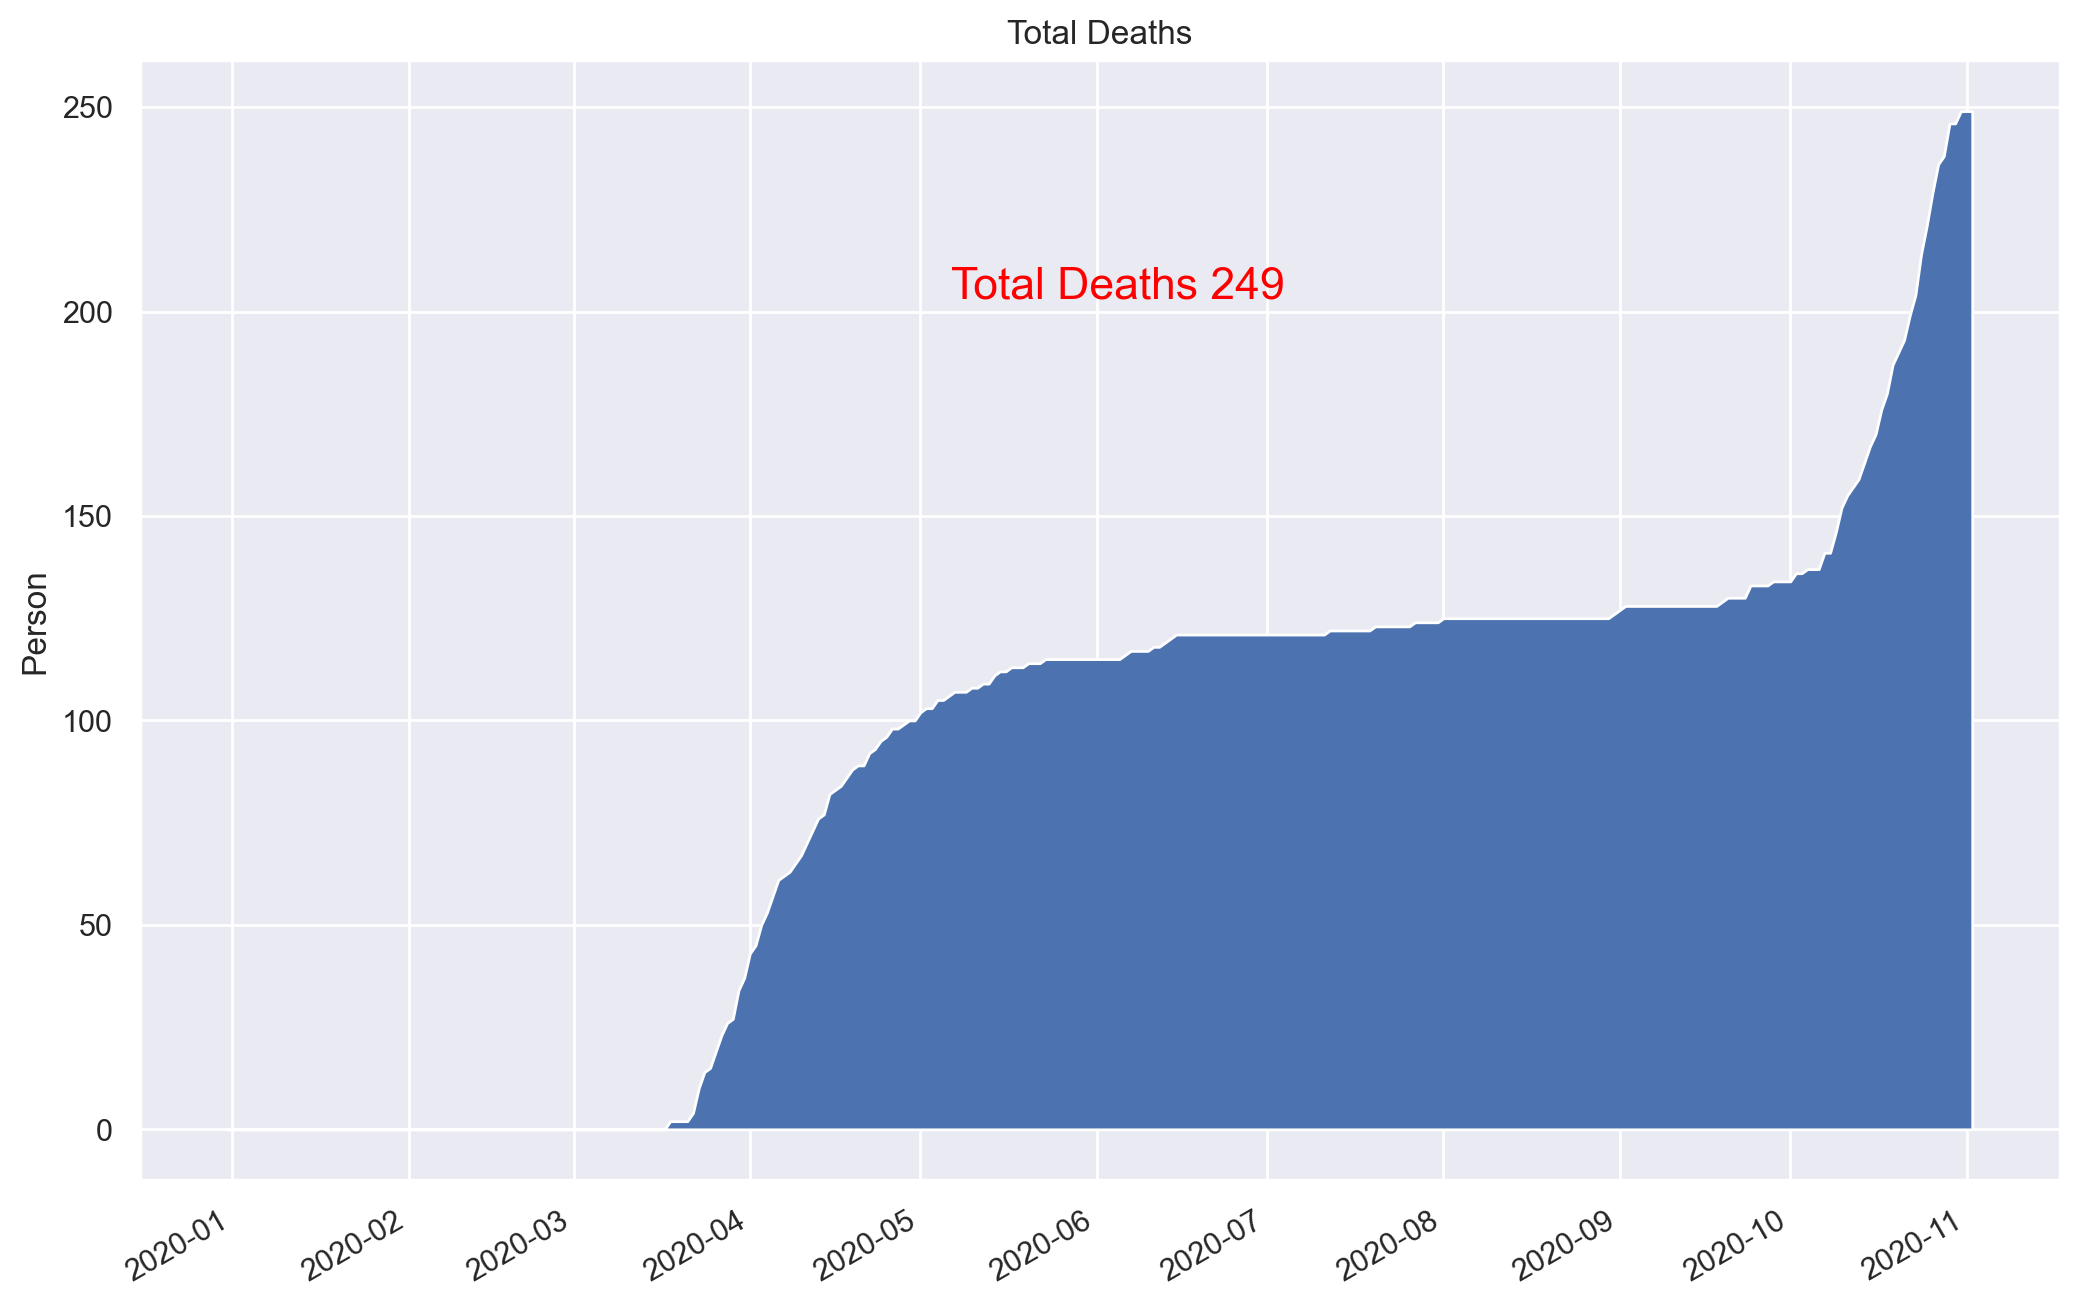

In [75]:
sns.set(context='notebook', 
        style='darkgrid', 
        font='arial', 
        font_scale=1)

fig = plt.figure(figsize=(12, 7), dpi=200)

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.fill_between(bd_deaths.index, bd_deaths.values.cumsum())
plt.title('Total Deaths')
plt.ylabel('Person')

to_dea = 'Total Deaths ' + str(sum(bd_deaths))

fig.text(0.438, 0.73, to_dea, dict(size=16, color='red'))

plt.gcf().autofmt_xdate()

# Total Recovery

In [76]:
my_data = pd.read_csv('C:/Users/tuhin/DATA SCIENCE/DATA ANALYSIS & VISUALIZATION/dataSet/covid_19_recovered.csv')     
my_data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [77]:
new_data = my_data.copy()

In [78]:
new_data.set_index(['Country', 'Date'], inplace=True)

In [79]:
my = new_data.loc['Malaysia']
my

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,3,0,0
2020-01-26,4,0,0
...,...,...,...
2020-10-28,29441,19072,246
2020-10-29,30090,19757,246
2020-10-30,30889,20248,249


In [80]:
ind = pd.date_range(start='20200122', periods=285, freq='D')

In [81]:
tot_re = [0]
tot_cas = [0]
tot_dea = [0]
inde = 0
for x in range(len(my.index)):
    if inde == 0:
        pass
    else:
        tot_re.append(my['Recovered'].values[x] - my['Recovered'].values[x-1])
        tot_cas.append(my['Confirmed'].values[x] - my['Confirmed'].values[x-1])
        tot_dea.append(my['Deaths'].values[x] - my['Deaths'].values[x-1])
        
    inde += 1

In [82]:
to_rec = 'Total Recovered ' + str(sum(tot_re))

### View - 1

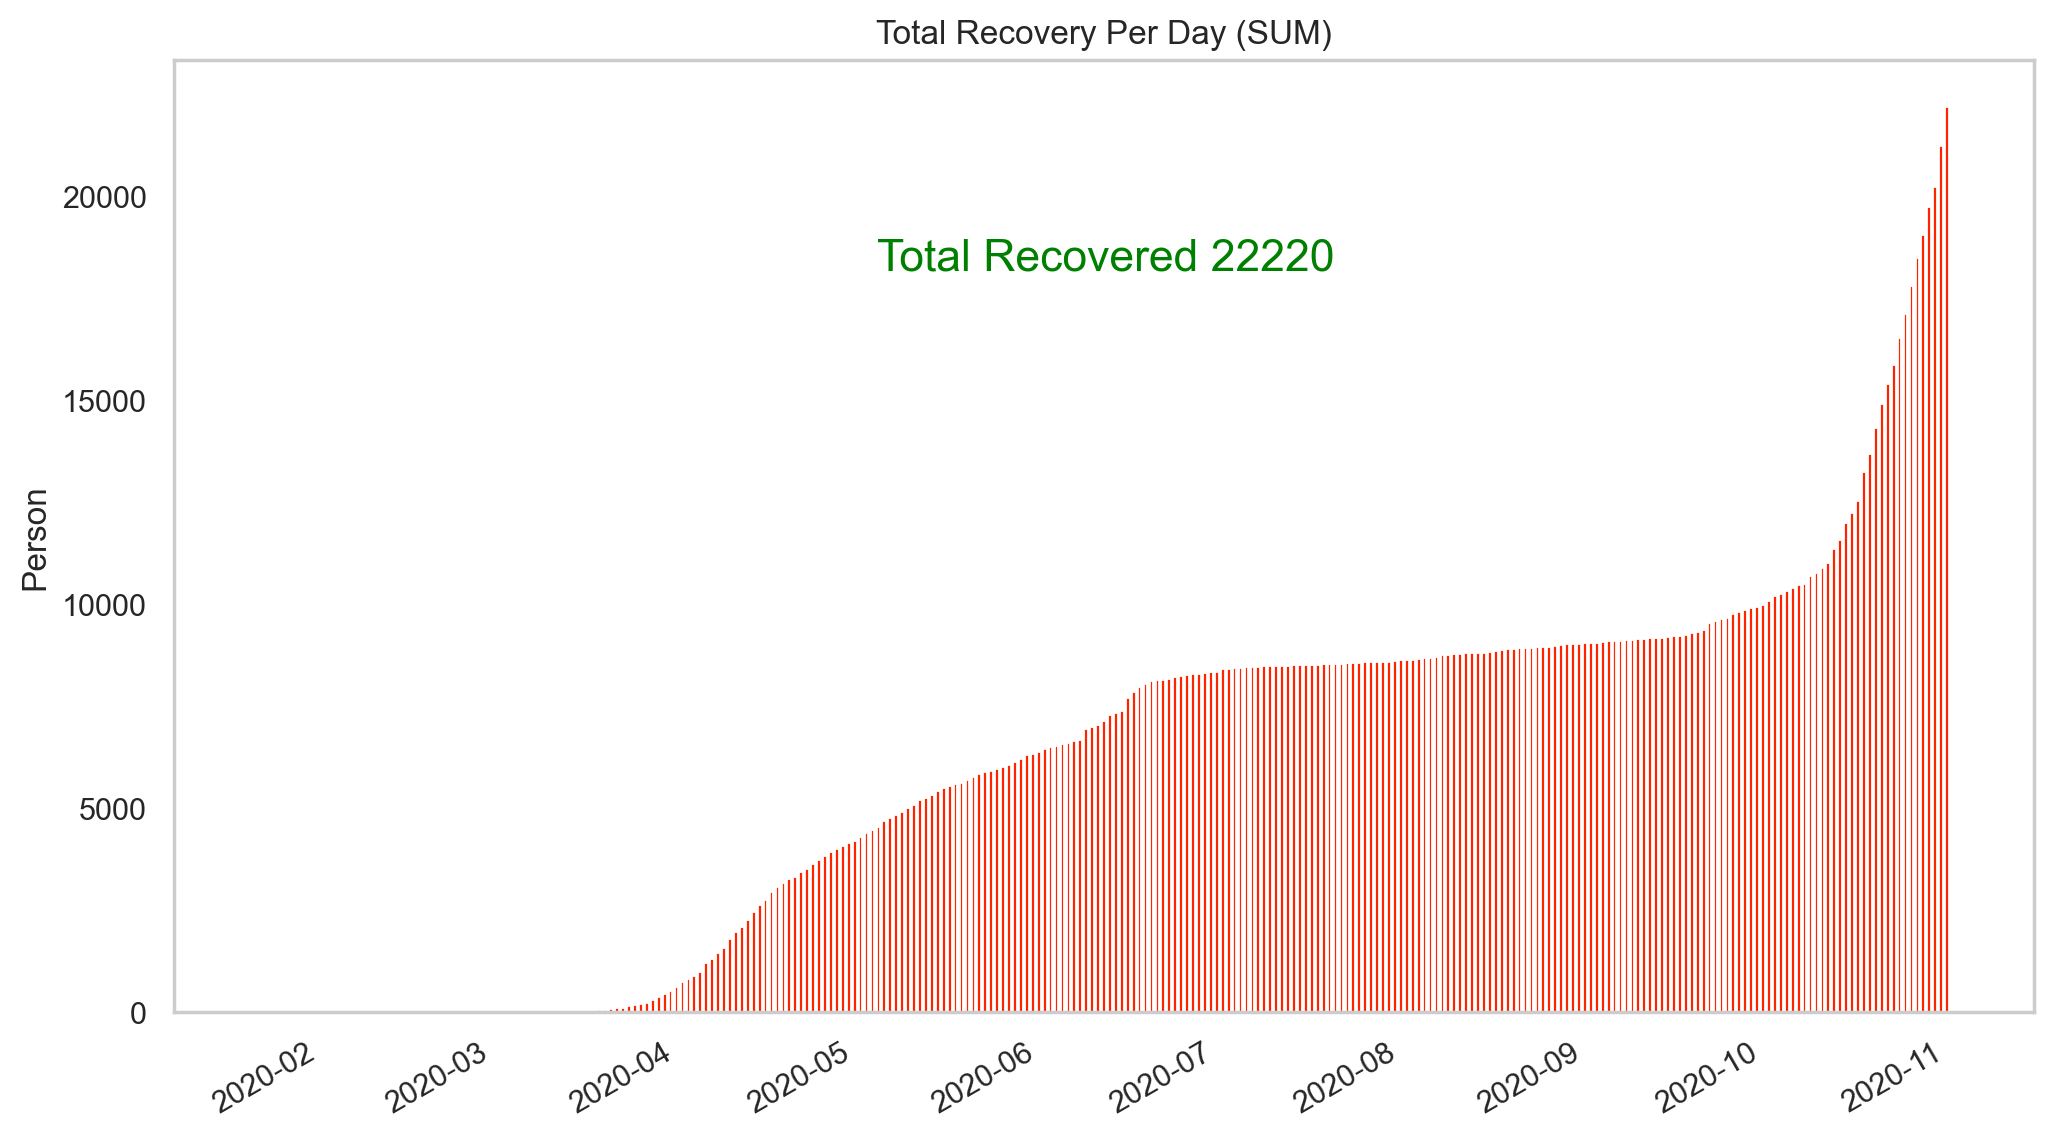

In [83]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='autumn', 
        font='arial', 
        font_scale=1)

fig, axes = plt.subplots(figsize=(12, 7), dpi=200)

axes.bar(ind, my['Recovered'])
plt.title('Total Recovery Per Day (SUM)')
plt.ylabel('Person')

fig.text(0.418, 0.73, to_rec, dict(size=16, color='green'))

plt.gcf().autofmt_xdate()
plt.grid()

### View - 2

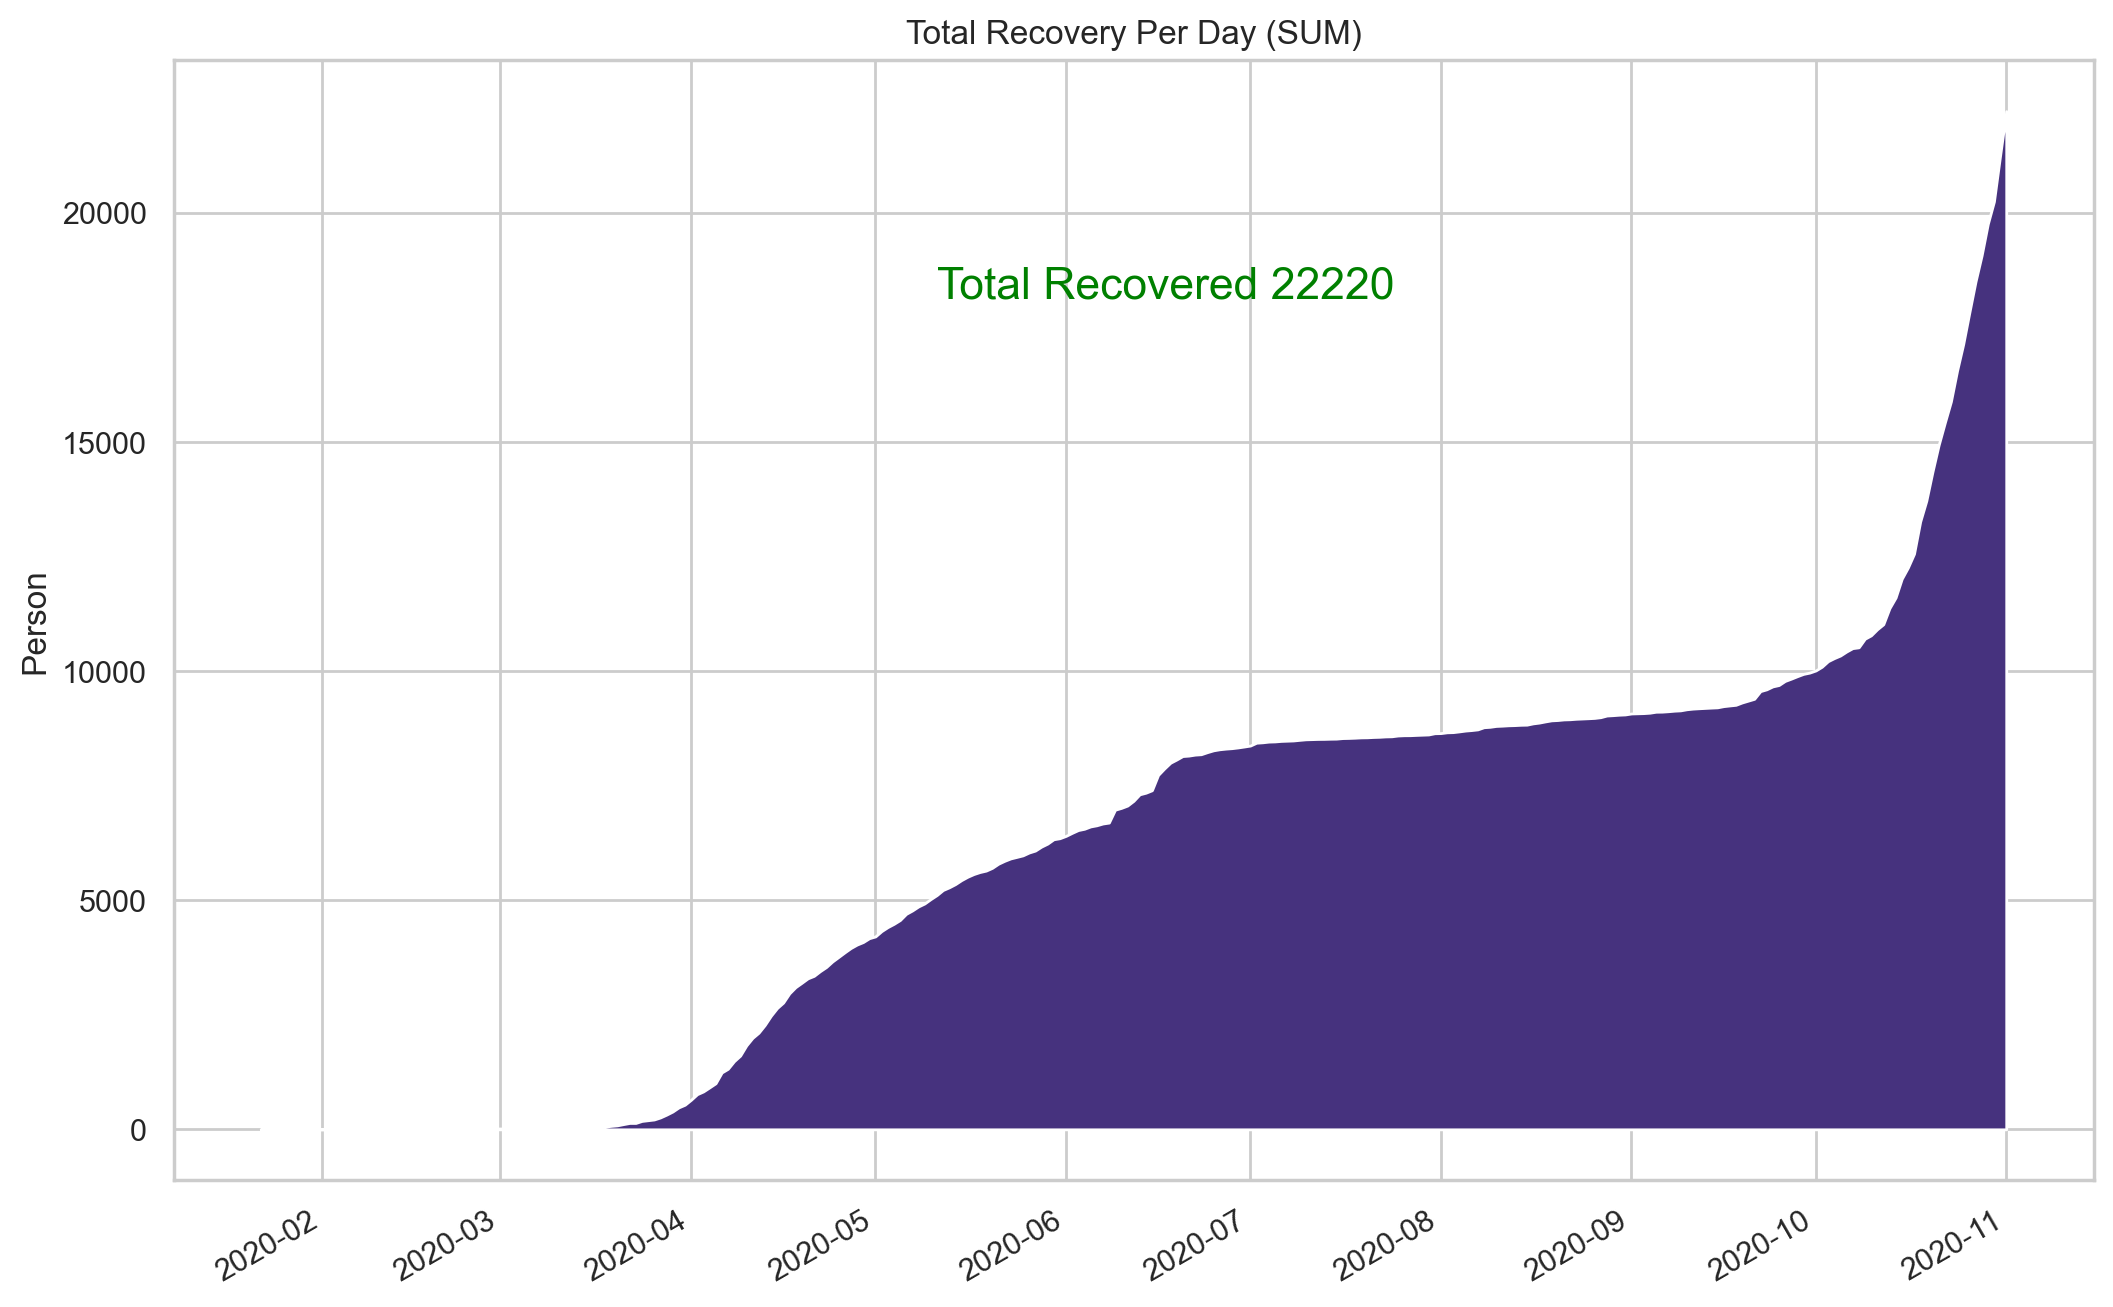

In [84]:
sns.set(context='notebook', 
        style='whitegrid',
        palette='viridis', 
        font='arial', 
        font_scale=1)

fig = plt.figure(figsize=(12, 7), dpi=200)

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.fill_between(ind, my['Recovered'])
plt.title('Total Recovery Per Day (SUM)')
plt.ylabel('Person')


fig.text(0.418, 0.73, to_rec, dict(size=16, color='green'))

plt.gcf().autofmt_xdate()

# New Recovery Per Day

In [85]:
my_val = []

for x in my['Recovered'].values:
    my_val.append(round(x))
    
new_val = []    
    
for x in range(len(my_val)):
    if x==0:
        new_val.append(my_val[x])
    else:    
        new_val.append(my_val[x]-my_val[x-1])

### View - 1

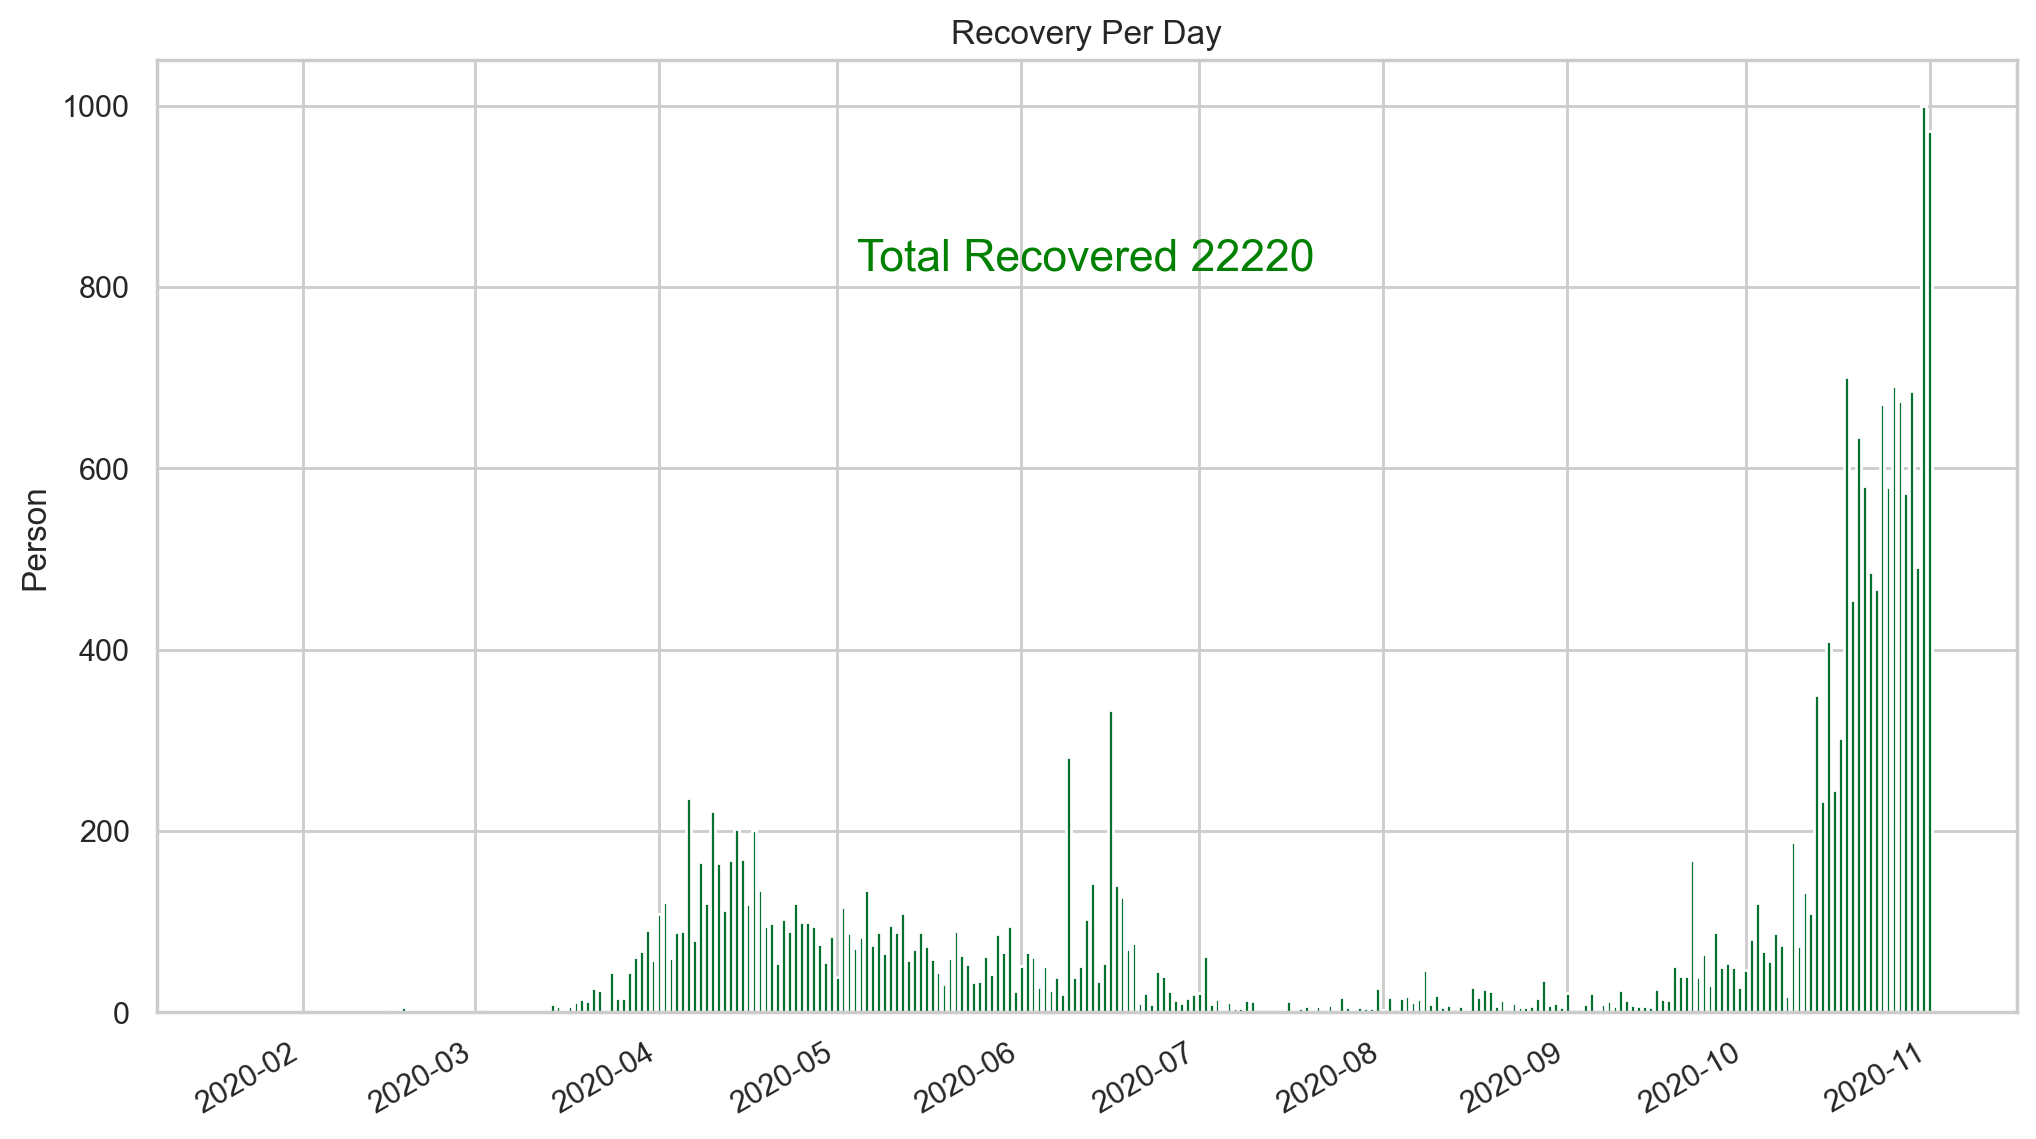

In [86]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='BuGn_r', 
        font='arial', 
        font_scale=1)

fig, axes = plt.subplots(figsize=(12, 7), dpi=200)

fig.text(0.417, 0.73, to_rec, dict(size=16, color='green'))

axes.bar(ind, new_val)
plt.title('Recovery Per Day')
plt.ylabel('Person')

plt.gcf().autofmt_xdate()

### View - 2

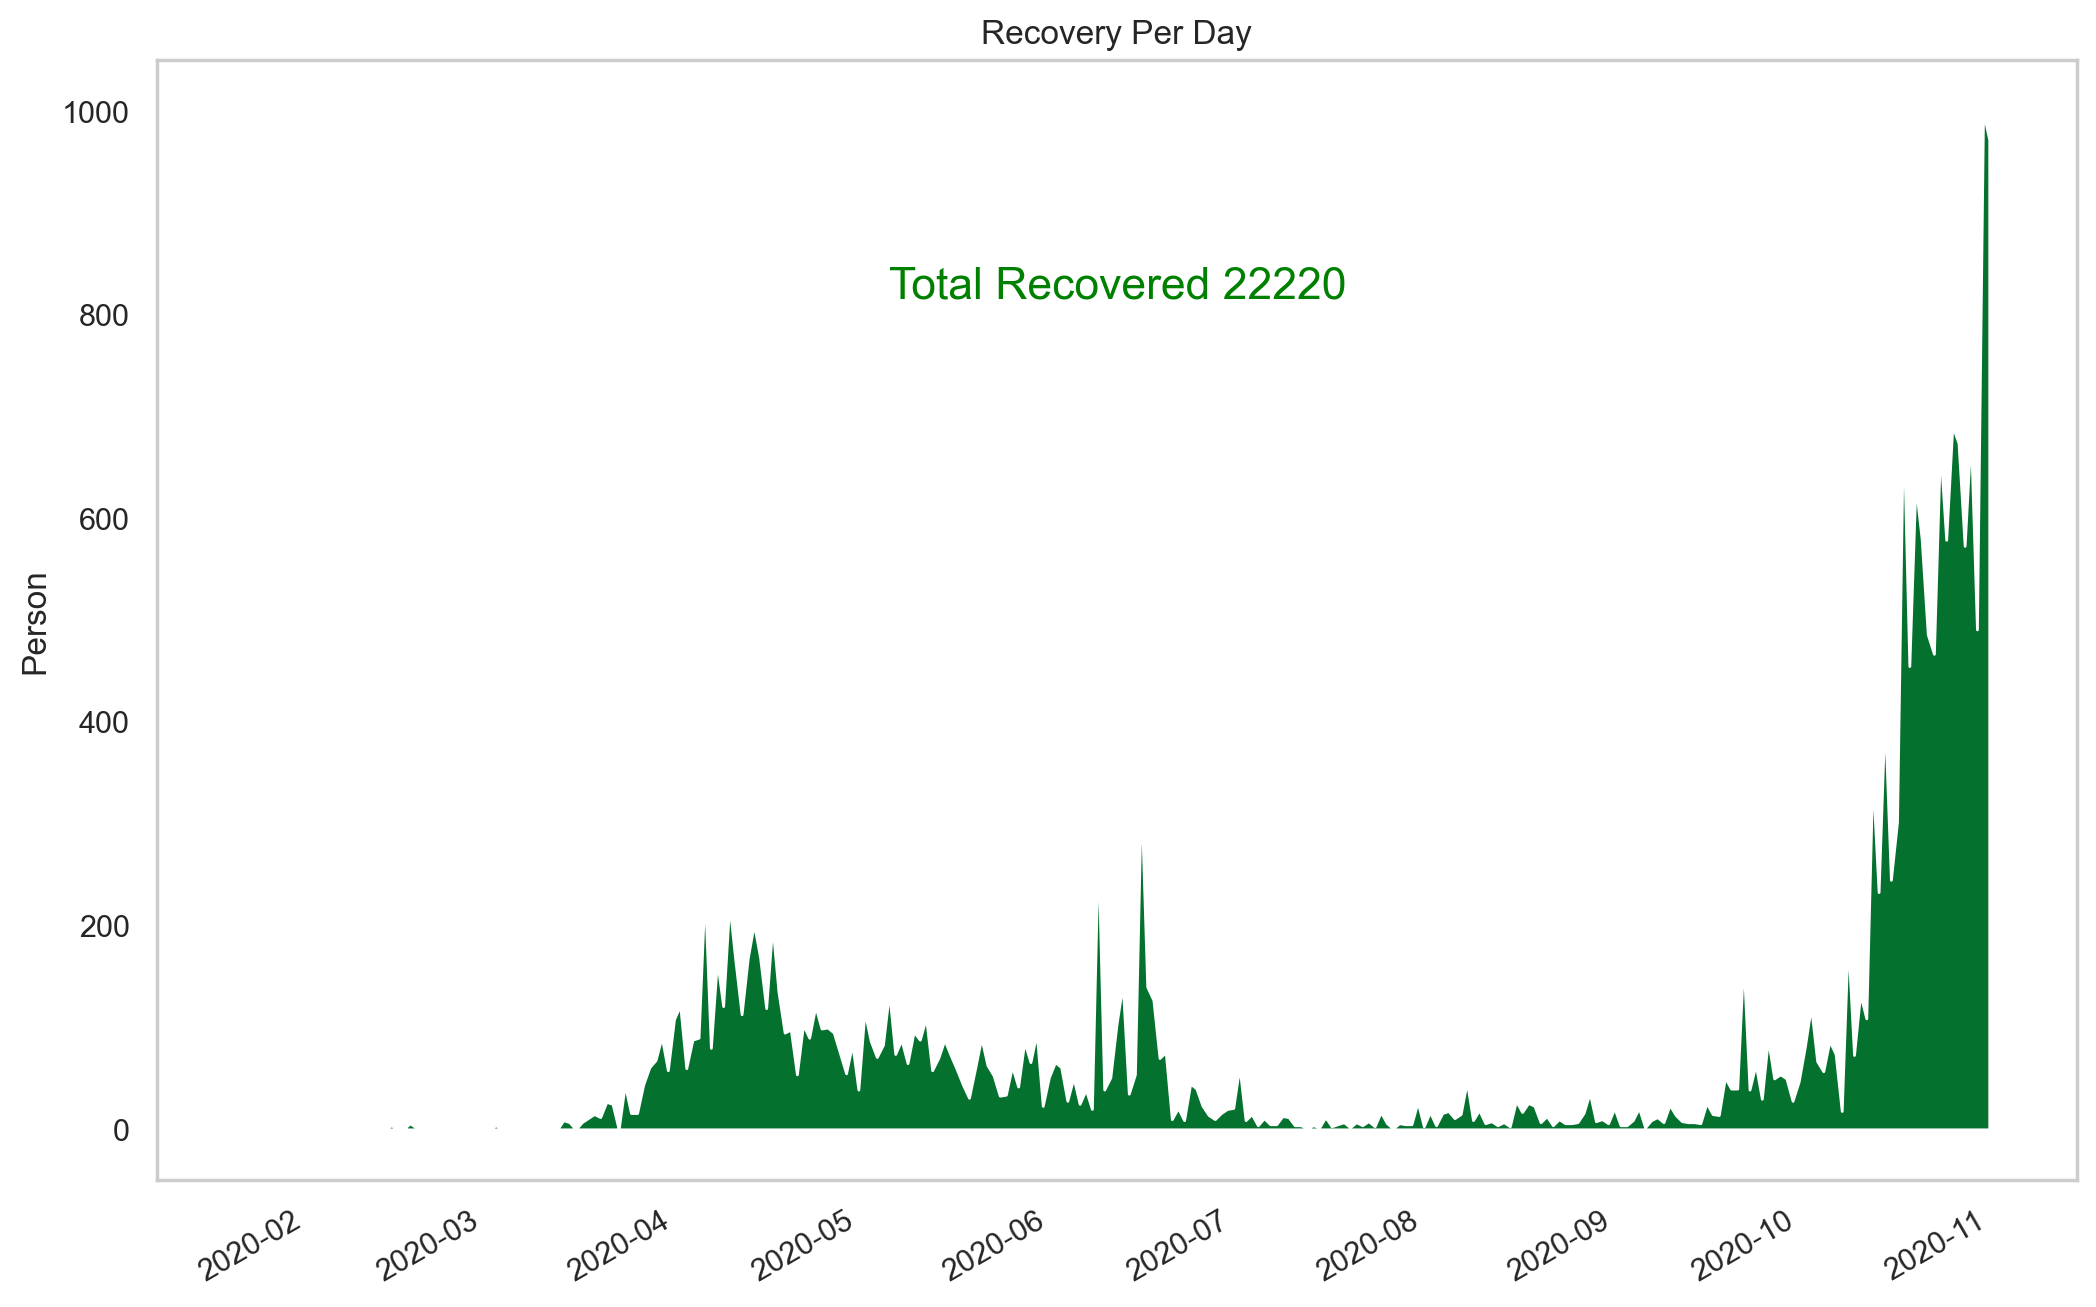

In [87]:
fig = plt.figure(figsize=(12, 7), dpi=200)

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.fill_between(ind, new_val)
plt.title('Recovery Per Day')
plt.ylabel('Person')

fig.text(0.405, 0.73, to_rec, dict(size=16, color='green'))

plt.gcf().autofmt_xdate()
plt.grid()

# New Cases vs New Recovered Per Day

In [88]:
new_data = my_data.copy()

In [89]:
new_data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [90]:
new_data.set_index(['Country', 'Date'], inplace=True)

In [91]:
my = new_data.loc['Malaysia']
my

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,3,0,0
2020-01-26,4,0,0
...,...,...,...
2020-10-28,29441,19072,246
2020-10-29,30090,19757,246
2020-10-30,30889,20248,249


In [92]:
my.shape

(285, 3)

In [93]:
ind = pd.date_range(start='20200122', periods=285, freq='D')

In [94]:
tot_re = [0]
tot_cas = [0]
tot_dea = [0]
inde = 0
for x in range(len(my.index)):
    if inde == 0:
        pass
    else:
        tot_re.append(my['Recovered'].values[x] - my['Recovered'].values[x-1])
        tot_cas.append(my['Confirmed'].values[x] - my['Confirmed'].values[x-1])
        tot_dea.append(my['Deaths'].values[x] - my['Deaths'].values[x-1])
        
    inde += 1

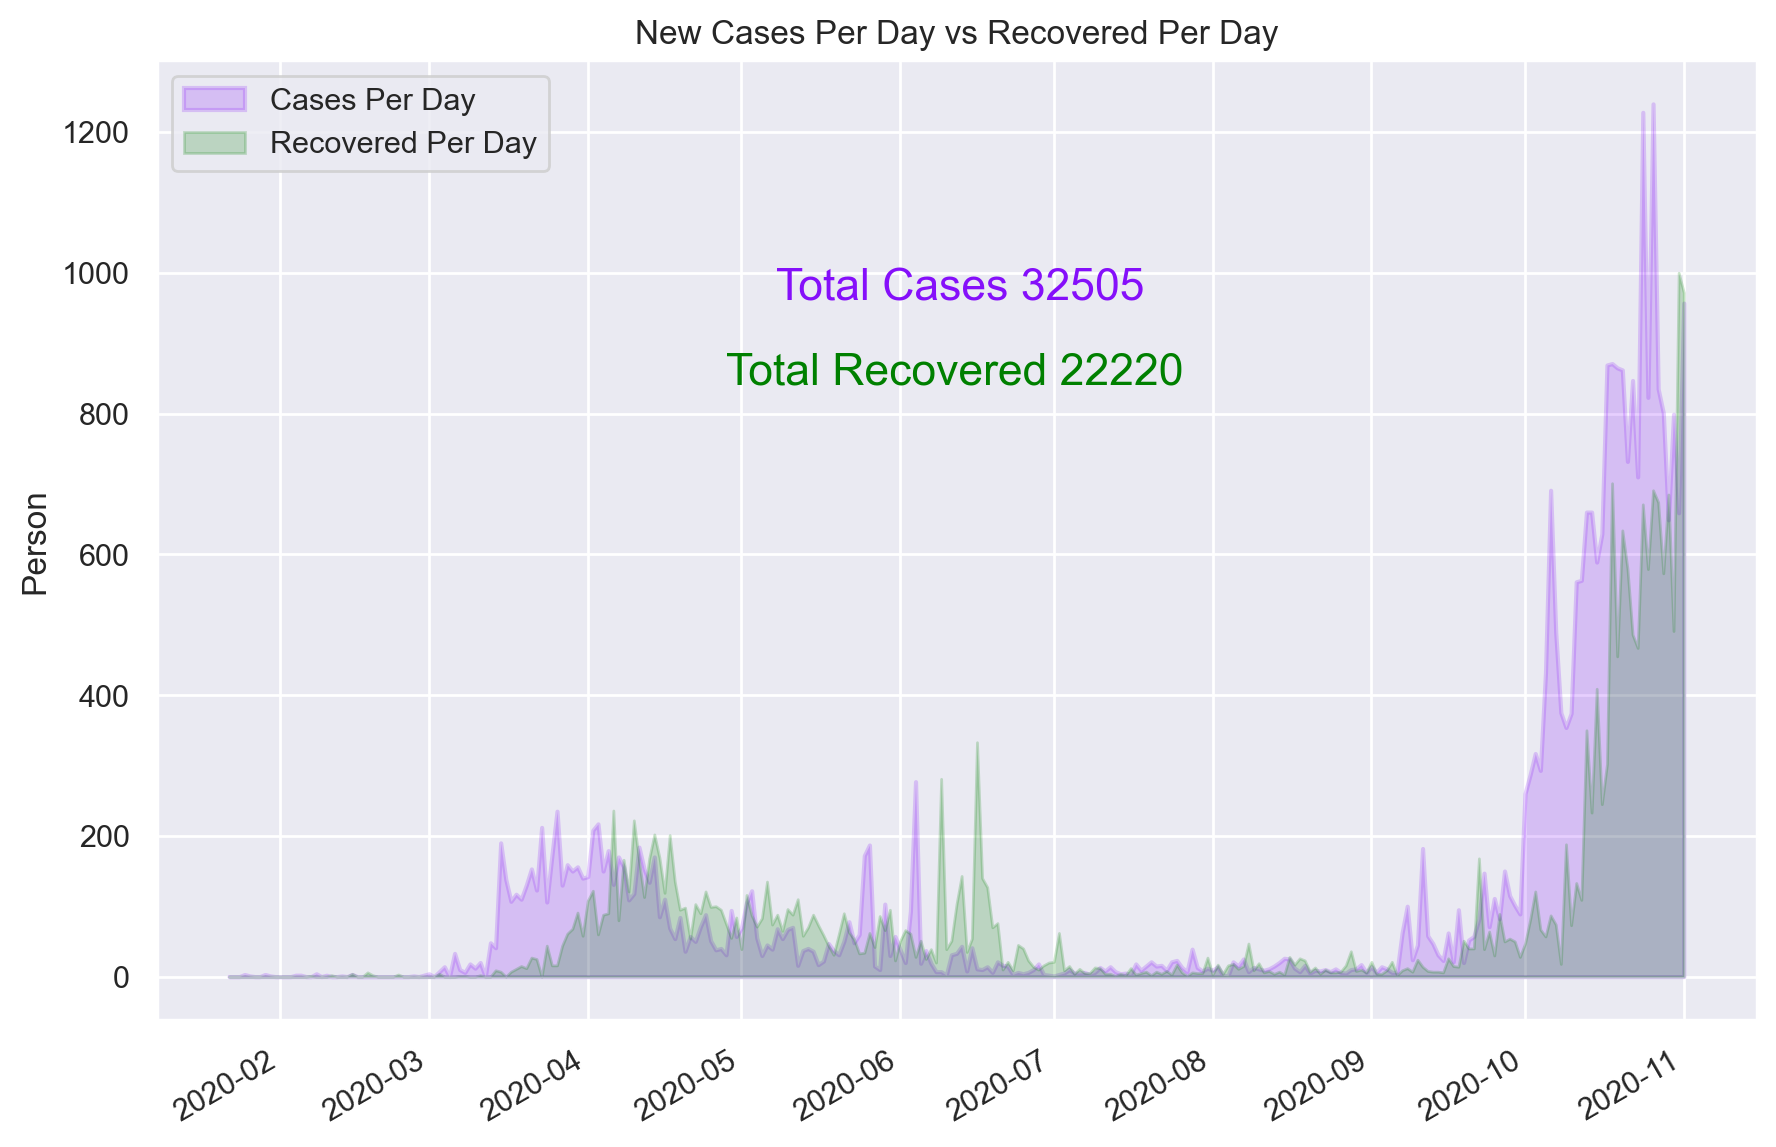

In [95]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(10, 6), dpi=200)

axes = fig.add_axes([.1, .1, .8, .8])

axes.fill_between(ind, tot_cas, label='Cases Per Day', color='#850ffa', lw=1.5, ls='-', alpha=.2)
axes.fill_between(ind, tot_re, label='Recovered Per Day', color='#008000', lw=1, ls='-', alpha=.2)

plt.title('New Cases Per Day vs Recovered Per Day')
plt.ylabel('Person')


total_cas = 'Total Cases ' + str(sum(tot_cas))
total_recov = 'Total Recovered ' + str(sum(tot_re))

fig.text(0.41, 0.7, total_cas, dict(size=16, color='#850ffa'))
fig.text(0.385, 0.63, total_recov, dict(size=16, color='#008000'))

axes.legend(loc=2)

plt.gcf().autofmt_xdate()

# Cases vs Recovered vs Deaths Per Day

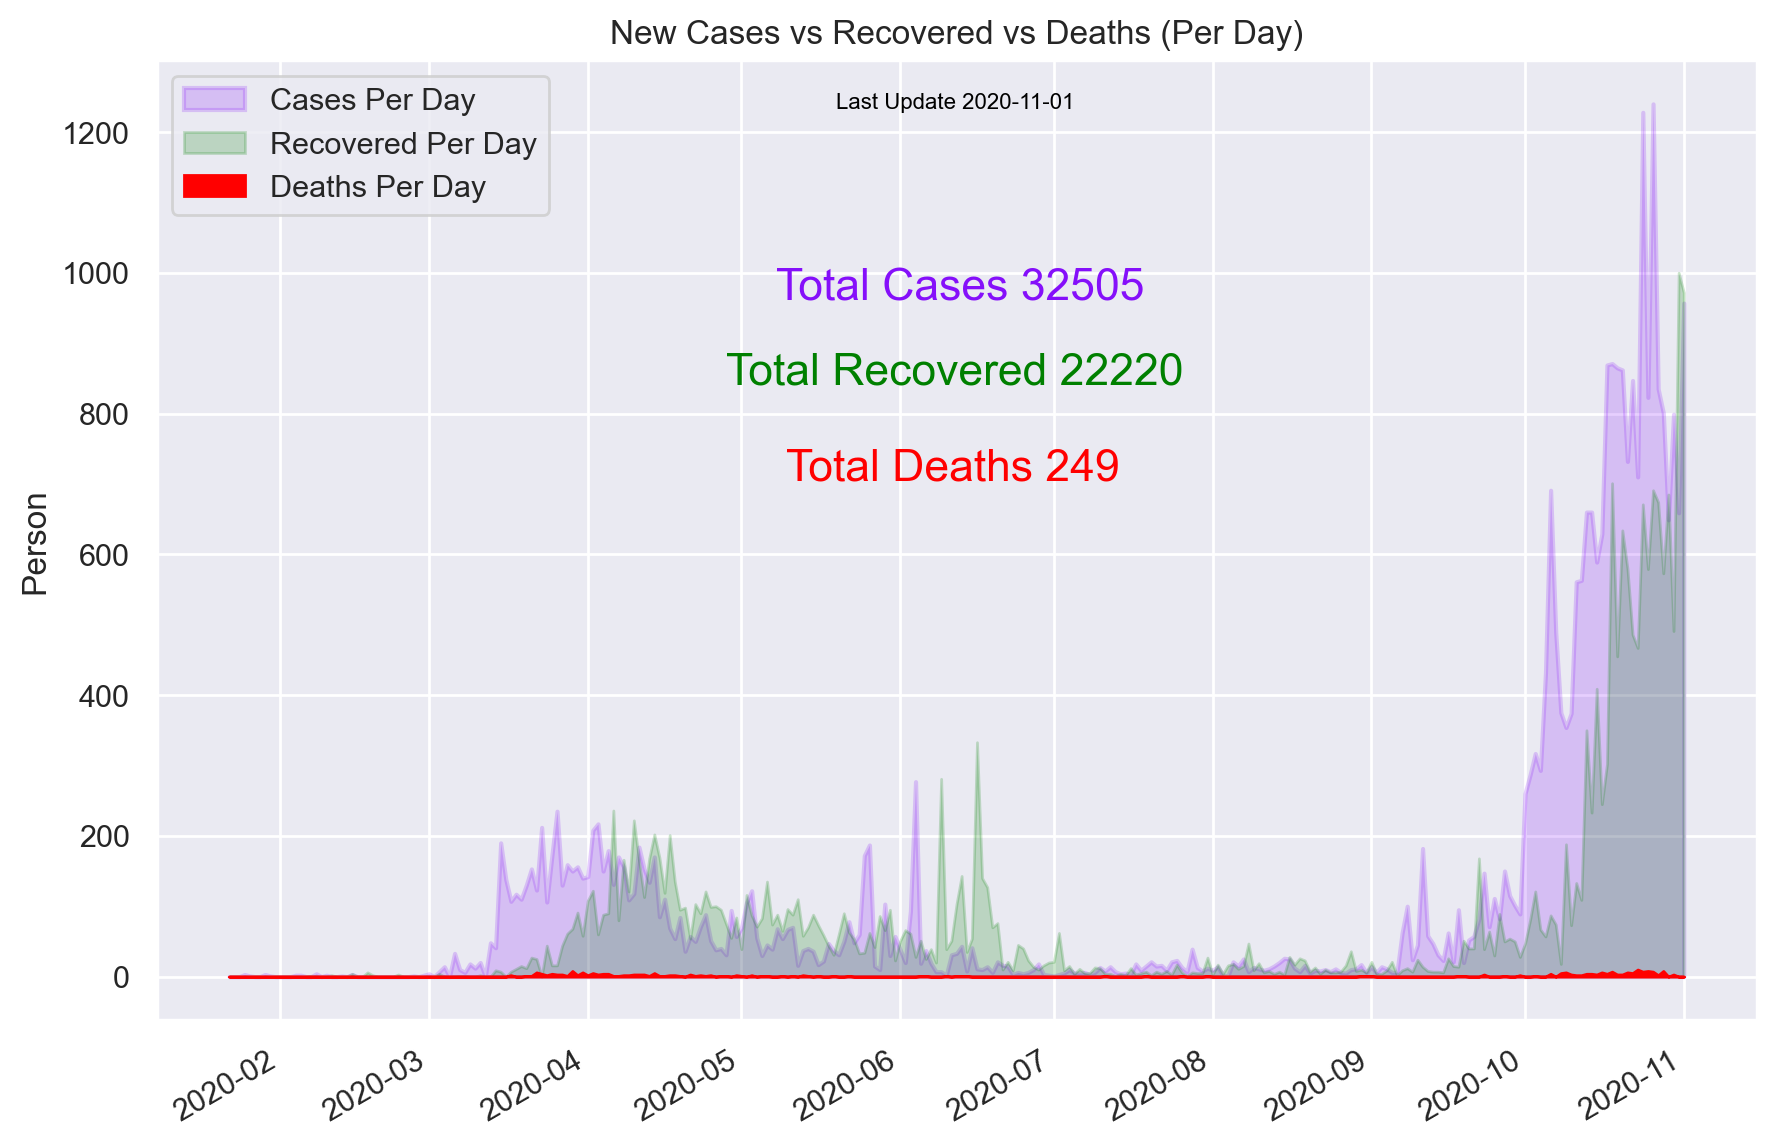

In [96]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(10, 6), dpi=200)

axes = fig.add_axes([.1, .1, .8, .8])

axes.fill_between(ind, tot_cas, label='Cases Per Day', color='#850ffa', lw=1.5, ls='-', alpha=.2)
axes.fill_between(ind, tot_re, label='Recovered Per Day', color='#008000', lw=1, ls='-', alpha=.2)
axes.fill_between(ind, tot_dea, label='Deaths Per Day', color='#ff0000', lw=1, ls='-', alpha=1)

plt.title('New Cases vs Recovered vs Deaths (Per Day)')
plt.ylabel('Person')


lst_ind = 'Last Update ' + str(my.index[-1])
total_cas = 'Total Cases ' + str(sum(tot_cas))
total_recov = 'Total Recovered ' + str(sum(tot_re))
total_deaths = 'Total Deaths ' + str(sum(tot_dea))


fig.text(0.44, 0.86, lst_ind, dict(size=8, color='black'))
fig.text(0.41, 0.7, total_cas, dict(size=16, color='#850ffa'))
fig.text(0.385, 0.63, total_recov, dict(size=16, color='#008000'))
fig.text(0.415, 0.55, total_deaths, dict(size=16, color='red'))

axes.legend(loc=2)

plt.gcf().autofmt_xdate()